HUNGARIAN LEGAL TEXT READABILITY CLASSIFIER
HuBERT Fine-tuning Pipeline

Configuration:
  Model: SZTAKI-HLT/hubert-base-cc
  Batch size: 8
  Learning rate: 2e-05
  Epochs: 5
  Max length: 256
  Train path: /content/sample_data/train.csv
  Test path: /content/sample_data/test.csv
LOADING DATA

Training data: (2906, 8)
Test data: (132, 15)

Loading tokenizer: SZTAKI-HLT/hubert-base-cc
✓ Tokenizer loaded (vocab size: 32001)

Class weights:
  Class 1: 4.4030
  Class 2: 1.8277
  Class 3: 0.9167
  Class 4: 0.6283
  Class 5: 0.6479

CREATING DATA SPLITS

Tokenizing training data...
✓ Training data tokenized: 2906 samples
Tokenizing test data...
✓ Test data tokenized: 132 samples

Split sizes:
  Training:   2324 samples
  Validation: 582 samples
  Test:       132 samples

Label distribution in training:
  Class 1:  106 samples ( 4.56%)
  Class 2:  254 samples (10.93%)
  Class 3:  507 samples (21.82%)
  Class 4:  740 samples (31.84%)
  Class 5:  717 samples (30.85%)

CREATING DATALOADERS
✓ Crea

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at SZTAKI-HLT/hubert-base-cc and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ Model loaded and moved to cuda
  Total parameters: 110,621,957
  Trainable parameters: 110,621,957

✓ Class weights prepared: ['4.403', '1.828', '0.917', '0.628', '0.648']
✓ Loss function: CrossEntropyLoss with class weights
✓ Optimizer: AdamW (lr=2e-05)
✓ Scheduler: Linear with warmup
  Total training steps: 1455
  Warmup steps: 145

✓ Log file: /content/sample_data/log/training_log_20251206_154544.txt

✓ All training components initialized!

STARTING TRAINING

Training for 5 epochs...

EPOCH 1/5


Epoch 1: 100%|██████████| 291/291 [00:50<00:00,  5.71it/s, loss=1.7026, acc=0.3507]



Train Loss: 1.5175, Train Acc: 0.3507


Validating: 100%|██████████| 73/73 [00:03<00:00, 19.07it/s]


Val Loss:   1.4310, Val Acc:   0.3677
  Per-class recall: C1:0.77 C2:0.02 C3:0.04 C4:0.34 C5:0.70 
✓ New best model saved! (Val Acc: 0.3677)

EPOCH 2/5


Epoch 2: 100%|██████████| 291/291 [00:49<00:00,  5.83it/s, loss=1.0472, acc=0.4221]



Train Loss: 1.3650, Train Acc: 0.4221


Validating: 100%|██████████| 73/73 [00:03<00:00, 18.87it/s]


Val Loss:   1.3911, Val Acc:   0.3797
  Per-class recall: C1:0.31 C2:0.56 C3:0.09 C4:0.09 C5:0.83 
✓ New best model saved! (Val Acc: 0.3797)

EPOCH 3/5


Epoch 3: 100%|██████████| 291/291 [00:50<00:00,  5.79it/s, loss=0.8764, acc=0.4552]



Train Loss: 1.2154, Train Acc: 0.4552


Validating: 100%|██████████| 73/73 [00:03<00:00, 18.96it/s]


Val Loss:   1.3127, Val Acc:   0.4261
  Per-class recall: C1:0.50 C2:0.19 C3:0.32 C4:0.48 C5:0.52 
✓ New best model saved! (Val Acc: 0.4261)

EPOCH 4/5


Epoch 4: 100%|██████████| 291/291 [00:50<00:00,  5.81it/s, loss=0.4734, acc=0.5624]



Train Loss: 1.0131, Train Acc: 0.5624


Validating: 100%|██████████| 73/73 [00:03<00:00, 18.84it/s]


Val Loss:   1.4551, Val Acc:   0.4622
  Per-class recall: C1:0.23 C2:0.33 C3:0.12 C4:0.49 C5:0.76 
✓ New best model saved! (Val Acc: 0.4622)

EPOCH 5/5


Epoch 5: 100%|██████████| 291/291 [00:50<00:00,  5.79it/s, loss=0.3650, acc=0.6842]



Train Loss: 0.7766, Train Acc: 0.6842


Validating: 100%|██████████| 73/73 [00:03<00:00, 18.85it/s]


Val Loss:   1.4929, Val Acc:   0.4553
  Per-class recall: C1:0.31 C2:0.33 C3:0.23 C4:0.41 C5:0.73 

TRAINING COMPLETE!

Best validation accuracy: 0.4622 (Epoch 4)

Loading best model from /content/sample_data/model/best_model.pt...
✓ Loaded best model from epoch 4

TRAINING HISTORY


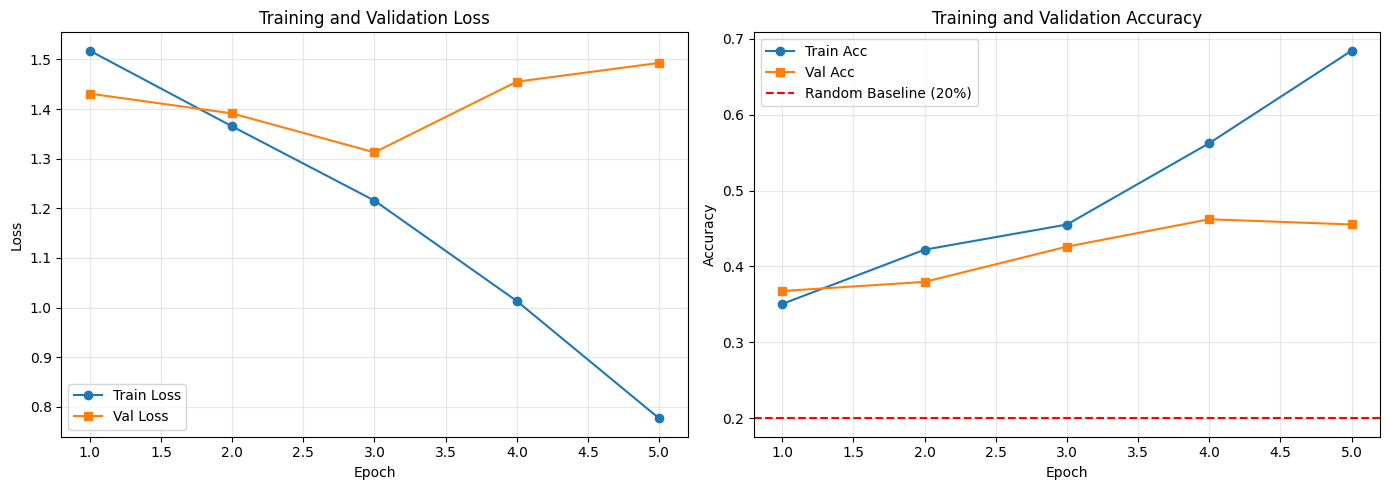

✓ Training history saved to /content/sample_data/model/training_history.png

TRAINING COMPLETE!

Best model saved to: /content/sample_data/model/best_model.pt
To run full evaluation, use: python 02b_evaluate.py


In [ ]:
"""
HuBERT Fine-tuning Script for Hungarian Legal Text Readability Classification

This script fine-tunes the SZTAKI-HLT/hubert-base-cc model for predicting
readability scores (1-5) of Hungarian ÁSZF (Terms and Conditions) texts.

The script is organized into three main components:
    1. DataPreprocessor - Handles data loading, tokenization, and dataset creation
    2. ModelTrainer - Handles model initialization and training loop
    3. ModelEvaluator - Handles evaluation metrics and visualization

Input:
    - data/final/train.csv
    - data/final/test.csv

Output:
    - models/best_model.pt
    - logs/training_log_<timestamp>.txt
    - models/training_history.png
    - models/confusion_matrix_*.png
"""

from typing import List, Dict, Tuple, Optional, Any
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from dataclasses import dataclass, field
from torch.optim import AdamW
from pathlib import Path
from tqdm import tqdm
import torch.nn as nn
import pandas as pd
import numpy as np
import datetime
import warnings
import torch

from transformers import (
    AutoModelForSequenceClassification,
    get_linear_schedule_with_warmup,
    AutoTokenizer,
)

warnings.filterwarnings('ignore')


# =============================================================================
# CONFIGURATION
# =============================================================================

@dataclass
class TrainingConfig:
    """Configuration for model training."""

    # Model settings
    model_name: str = 'SZTAKI-HLT/hubert-base-cc'
    num_classes: int = 5
    max_length: int = 256

    # Training hyperparameters
    batch_size: int = 8
    learning_rate: float = 2e-5
    num_epochs: int = 5
    warmup_ratio: float = 0.1
    val_split: float = 0.2

    # Paths (stored as strings internally, converted via properties)
    _train_path: str = 'data/final/train.csv'
    _test_path: str = 'data/final/test.csv'
    _model_dir: str = 'models'
    _log_dir: str = 'logs'

    # Random seed
    random_seed: int = 42

    @property
    def train_path(self) -> Path:
        """Get train_path as Path object."""
        return Path(self._train_path)

    @train_path.setter
    def train_path(self, value: Any) -> None:
        """Set train_path from string or Path."""
        self._train_path = str(value)

    @property
    def test_path(self) -> Path:
        """Get test_path as Path object."""
        return Path(self._test_path)

    @test_path.setter
    def test_path(self, value: Any) -> None:
        """Set test_path from string or Path."""
        self._test_path = str(value)

    @property
    def model_dir(self) -> Path:
        """Get model_dir as Path object."""
        return Path(self._model_dir)

    @model_dir.setter
    def model_dir(self, value: Any) -> None:
        """Set model_dir from string or Path."""
        self._model_dir = str(value)

    @property
    def log_dir(self) -> Path:
        """Get log_dir as Path object."""
        return Path(self._log_dir)

    @log_dir.setter
    def log_dir(self, value: Any) -> None:
        """Set log_dir from string or Path."""
        self._log_dir = str(value)


@dataclass
class TrainingHistory:
    """Container for training history metrics."""

    train_loss: List[float] = field(default_factory=list)
    train_acc: List[float] = field(default_factory=list)
    val_loss: List[float] = field(default_factory=list)
    val_acc: List[float] = field(default_factory=list)
    best_epoch: int = 0
    best_val_accuracy: float = 0.0


# =============================================================================
# DATASET CLASS
# =============================================================================

class ASZFDataset(Dataset):
    """PyTorch Dataset for ÁSZF readability classification."""

    def __init__(self, encodings: Dict[str, List[Any]]):
        """
        Initialize the dataset.

        Args:
            encodings: Dictionary containing input_ids, attention_mask, and labels
        """
        self.encodings: Dict[str, List[Any]] = encodings

    def __len__(self) -> int:
        return len(self.encodings['labels'])

    def __getitem__(self, idx: int) -> Dict[str, torch.Tensor]:
        return {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx], dtype=torch.long),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx], dtype=torch.long),
            'labels': torch.tensor(self.encodings['labels'][idx] - 1, dtype=torch.long),  # Convert 1-5 to 0-4
        }


# =============================================================================
# DATA PREPROCESSOR
# =============================================================================

class DataPreprocessor:
    """
    Handles data loading, tokenization, and dataset creation.

    This class is responsible for:
        - Loading CSV data
        - Tokenizing texts using the HuBERT tokenizer
        - Creating train/validation/test splits
        - Computing class weights for imbalanced data
        - Creating PyTorch DataLoaders
    """

    def __init__(self, config: TrainingConfig):
        """
        Initialize the preprocessor.

        Args:
            config: Training configuration
        """
        self.config: TrainingConfig = config
        self.tokenizer: Optional[AutoTokenizer] = None
        self.class_weights: Optional[Dict[int, float]] = None

        # Data containers
        self.df_train: Optional[pd.DataFrame] = None
        self.df_test: Optional[pd.DataFrame] = None

        # Encoded datasets
        self.train_encodings: Optional[Dict[str, List[Any]]] = None
        self.val_encodings: Optional[Dict[str, List[Any]]] = None
        self.test_encodings: Optional[Dict[str, List[Any]]] = None

    def load_data(self) -> Tuple[pd.DataFrame, pd.DataFrame]:
        """
        Load training and test data from CSV files.

        Returns:
            Tuple of (train_df, test_df)
        """
        print("=" * 60)
        print("LOADING DATA")
        print("=" * 60)

        self.df_train = pd.read_csv(self.config.train_path)
        self.df_test = pd.read_csv(self.config.test_path)

        print(f"\nTraining data: {self.df_train.shape}")
        print(f"Test data: {self.df_test.shape}")

        return self.df_train, self.df_test

    def load_tokenizer(self) -> AutoTokenizer:
        """
        Load the tokenizer for the specified model.

        Returns:
            Loaded tokenizer
        """
        print(f"\nLoading tokenizer: {self.config.model_name}")

        self.tokenizer = AutoTokenizer.from_pretrained(self.config.model_name)

        print(f"✓ Tokenizer loaded (vocab size: {self.tokenizer.vocab_size})")

        return self.tokenizer

    def tokenize_texts(
        self,
        texts: np.ndarray,
        labels: np.ndarray,
    ) -> Dict[str, List[Any]]:
        """
        Tokenize texts and prepare encodings.

        Args:
            texts: Array of text strings
            labels: Array of label values

        Returns:
            Dictionary with input_ids, attention_mask, and labels
        """
        encodings = self.tokenizer(
            texts.tolist(),
            max_length=self.config.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors=None,
        )

        return {
            'input_ids': encodings['input_ids'],
            'attention_mask': encodings['attention_mask'],
            'labels': labels.tolist(),
        }

    def compute_class_weights(self) -> Dict[int, float]:
        """
        Compute class weights for handling class imbalance.

        Returns:
            Dictionary mapping class labels to weights
        """
        unique_labels: np.ndarray = np.unique(self.df_train['label_numeric'])

        weights_array: np.ndarray = compute_class_weight(
            class_weight='balanced',
            classes=unique_labels,
            y=self.df_train['label_numeric'],
        )

        self.class_weights = dict(zip(unique_labels, weights_array))

        print("\nClass weights:")
        for cls, weight in self.class_weights.items():
            print(f"  Class {cls}: {weight:.4f}")

        return self.class_weights

    def create_splits(self) -> Tuple[Dict, Dict, Dict]:
        """
        Create train/validation/test splits with tokenized data.

        Returns:
            Tuple of (train_encodings, val_encodings, test_encodings)
        """
        print("\n" + "=" * 60)
        print("CREATING DATA SPLITS")
        print("=" * 60)

        # Tokenize all training data first
        print("\nTokenizing training data...")
        full_train_encodings: Dict[str, List[Any]] = self.tokenize_texts(
            self.df_train['text'].values,
            self.df_train['label_numeric'].values,
        )
        print(f"✓ Training data tokenized: {len(full_train_encodings['input_ids'])} samples")

        # Tokenize test data
        print("Tokenizing test data...")
        self.test_encodings = self.tokenize_texts(
            self.df_test['text'].values,
            self.df_test['label_numeric'].values,
        )
        print(f"✓ Test data tokenized: {len(self.test_encodings['input_ids'])} samples")

        # Create train/validation split
        train_indices, val_indices = train_test_split(
            range(len(full_train_encodings['input_ids'])),
            test_size=self.config.val_split,
            random_state=self.config.random_seed,
            stratify=full_train_encodings['labels'],
        )

        # Split encodings
        self.train_encodings = {
            'input_ids': [full_train_encodings['input_ids'][i] for i in train_indices],
            'attention_mask': [full_train_encodings['attention_mask'][i] for i in train_indices],
            'labels': [full_train_encodings['labels'][i] for i in train_indices],
        }

        self.val_encodings = {
            'input_ids': [full_train_encodings['input_ids'][i] for i in val_indices],
            'attention_mask': [full_train_encodings['attention_mask'][i] for i in val_indices],
            'labels': [full_train_encodings['labels'][i] for i in val_indices],
        }

        print(f"\nSplit sizes:")
        print(f"  Training:   {len(self.train_encodings['input_ids'])} samples")
        print(f"  Validation: {len(self.val_encodings['input_ids'])} samples")
        print(f"  Test:       {len(self.test_encodings['input_ids'])} samples")

        # Print label distribution
        self._print_label_distribution()

        return self.train_encodings, self.val_encodings, self.test_encodings

    def _print_label_distribution(self) -> None:
        """Print label distribution in training set."""
        print("\nLabel distribution in training:")

        train_labels: pd.Series = pd.Series(self.train_encodings['labels'])
        label_dist: pd.Series = train_labels.value_counts().sort_index()

        for label, count in label_dist.items():
            pct: float = (count / len(train_labels)) * 100
            print(f"  Class {label}: {count:4d} samples ({pct:5.2f}%)")

    def create_dataloaders(self) -> Tuple[DataLoader, DataLoader, DataLoader]:
        """
        Create PyTorch DataLoaders for train, validation, and test sets.

        Returns:
            Tuple of (train_loader, val_loader, test_loader)
        """
        print("\n" + "=" * 60)
        print("CREATING DATALOADERS")
        print("=" * 60)

        # Create datasets
        train_dataset: ASZFDataset = ASZFDataset(self.train_encodings)
        val_dataset: ASZFDataset = ASZFDataset(self.val_encodings)
        test_dataset: ASZFDataset = ASZFDataset(self.test_encodings)

        print(f"✓ Created PyTorch datasets")
        print(f"  Train: {len(train_dataset)} samples")
        print(f"  Val:   {len(val_dataset)} samples")
        print(f"  Test:  {len(test_dataset)} samples")

        # Create dataloaders
        train_loader: DataLoader = DataLoader(
            train_dataset,
            batch_size=self.config.batch_size,
            shuffle=True,
        )

        val_loader: DataLoader = DataLoader(
            val_dataset,
            batch_size=self.config.batch_size,
            shuffle=False,
        )

        test_loader: DataLoader = DataLoader(
            test_dataset,
            batch_size=self.config.batch_size,
            shuffle=False,
        )

        print(f"\n✓ Created DataLoaders")
        print(f"  Train batches: {len(train_loader)}")
        print(f"  Val batches:   {len(val_loader)}")
        print(f"  Test batches:  {len(test_loader)}")

        # Verify sample batch
        sample_batch: Dict[str, torch.Tensor] = next(iter(train_loader))
        print(f"\nSample batch verification:")
        print(f"  input_ids shape: {sample_batch['input_ids'].shape}")
        print(f"  attention_mask shape: {sample_batch['attention_mask'].shape}")
        print(f"  labels shape: {sample_batch['labels'].shape}")
        print(f"  labels range: {sample_batch['labels'].min().item()} to {sample_batch['labels'].max().item()}")

        return train_loader, val_loader, test_loader

    def preprocess(self) -> Tuple[DataLoader, DataLoader, DataLoader, Dict[int, float]]:
        """
        Run the full preprocessing pipeline.

        Returns:
            Tuple of (train_loader, val_loader, test_loader, class_weights)
        """
        self.load_data()
        self.load_tokenizer()
        self.compute_class_weights()
        self.create_splits()
        train_loader, val_loader, test_loader = self.create_dataloaders()

        return train_loader, val_loader, test_loader, self.class_weights


# =============================================================================
# MODEL TRAINER
# =============================================================================

class ModelTrainer:
    """
    Handles model initialization and training loop.

    This class is responsible for:
        - Loading and configuring the model
        - Setting up optimizer and scheduler
        - Running the training loop
        - Saving checkpoints
        - Logging training progress
    """

    def __init__(
        self,
        config: TrainingConfig,
        train_loader: DataLoader,
        val_loader: DataLoader,
        class_weights: Dict[int, float],
    ):
        """
        Initialize the trainer.

        Args:
            config: Training configuration
            train_loader: DataLoader for training data
            val_loader: DataLoader for validation data
            class_weights: Dictionary of class weights
        """
        self.config: TrainingConfig = config
        self.train_loader: DataLoader = train_loader
        self.val_loader: DataLoader = val_loader
        self.class_weights: Dict[int, float] = class_weights

        # Device setup
        self.device: torch.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        # Model components (initialized in setup)
        self.model: Optional[AutoModelForSequenceClassification] = None
        self.optimizer: Optional[AdamW] = None
        self.scheduler: Optional[Any] = None
        self.criterion: Optional[nn.CrossEntropyLoss] = None

        # Training state
        self.history: TrainingHistory = TrainingHistory()
        self.log_file: Optional[Path] = None

        # Set random seeds
        self._set_random_seeds()

    def _set_random_seeds(self) -> None:
        """Set random seeds for reproducibility."""
        torch.manual_seed(self.config.random_seed)
        np.random.seed(self.config.random_seed)

    def setup(self) -> None:
        """Set up model, optimizer, scheduler, and logging."""
        print("\n" + "=" * 60)
        print("INITIALIZING TRAINING COMPONENTS")
        print("=" * 60)

        print(f"\nDevice: {self.device}")
        print(f"PyTorch version: {torch.__version__}")

        self._load_model()
        self._setup_criterion()
        self._setup_optimizer()
        self._setup_scheduler()
        self._setup_logging()

        print(f"\n✓ All training components initialized!")

    def _load_model(self) -> None:
        """Load and configure the model."""
        print(f"\nLoading model: {self.config.model_name}")

        self.model = AutoModelForSequenceClassification.from_pretrained(
            self.config.model_name,
            num_labels=self.config.num_classes,
            problem_type="single_label_classification",
        )
        self.model.to(self.device)

        print(f"✓ Model loaded and moved to {self.device}")

        # Count parameters
        total_params: int = sum(p.numel() for p in self.model.parameters())
        trainable_params: int = sum(p.numel() for p in self.model.parameters() if p.requires_grad)

        print(f"  Total parameters: {total_params:,}")
        print(f"  Trainable parameters: {trainable_params:,}")

    def _setup_criterion(self) -> None:
        """Set up loss function with class weights."""
        class_weights_list: List[float] = [self.class_weights[i] for i in range(1, 6)]
        class_weights_tensor: torch.Tensor = torch.tensor(
            class_weights_list,
            dtype=torch.float,
        ).to(self.device)

        self.criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

        print(f"\n✓ Class weights prepared: {[f'{w:.3f}' for w in class_weights_list]}")
        print(f"✓ Loss function: CrossEntropyLoss with class weights")

    def _setup_optimizer(self) -> None:
        """Set up the optimizer."""
        self.optimizer = AdamW(self.model.parameters(), lr=self.config.learning_rate)
        print(f"✓ Optimizer: AdamW (lr={self.config.learning_rate})")

    def _setup_scheduler(self) -> None:
        """Set up learning rate scheduler."""
        total_steps: int = len(self.train_loader) * self.config.num_epochs
        warmup_steps: int = int(self.config.warmup_ratio * total_steps)

        self.scheduler = get_linear_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=warmup_steps,
            num_training_steps=total_steps,
        )

        print(f"✓ Scheduler: Linear with warmup")
        print(f"  Total training steps: {total_steps}")
        print(f"  Warmup steps: {warmup_steps}")

    def _setup_logging(self) -> None:
        """Set up logging directory and file."""
        self.config.log_dir.mkdir(parents=True, exist_ok=True)
        self.config.model_dir.mkdir(parents=True, exist_ok=True)

        timestamp: str = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
        self.log_file = self.config.log_dir / f'training_log_{timestamp}.txt'

        print(f"\n✓ Log file: {self.log_file}")

        # Initialize log file
        with open(self.log_file, 'w') as f:
            f.write("=" * 60 + "\n")
            f.write("TRAINING LOG\n")
            f.write("=" * 60 + "\n")
            f.write(f"Timestamp: {timestamp}\n")
            f.write(f"Model: {self.config.model_name}\n")
            f.write(f"Device: {self.device}\n")
            f.write(f"Batch size: {self.config.batch_size}\n")
            f.write(f"Learning rate: {self.config.learning_rate}\n")
            f.write(f"Epochs: {self.config.num_epochs}\n")
            f.write("=" * 60 + "\n\n")

    def _train_epoch(self, epoch: int) -> Tuple[float, float]:
        """
        Train for one epoch.

        Args:
            epoch: Current epoch number

        Returns:
            Tuple of (average_loss, accuracy)
        """
        self.model.train()

        total_loss: float = 0.0
        correct: int = 0
        total: int = 0

        progress_bar = tqdm(self.train_loader, desc=f'Epoch {epoch}')

        for batch in progress_bar:
            # Move batch to device
            input_ids: torch.Tensor = batch['input_ids'].to(self.device)
            attention_mask: torch.Tensor = batch['attention_mask'].to(self.device)
            labels: torch.Tensor = batch['labels'].to(self.device)

            # Forward pass
            self.optimizer.zero_grad()
            outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
            logits: torch.Tensor = outputs.logits

            # Calculate loss
            loss: torch.Tensor = self.criterion(logits, labels)

            # Backward pass
            loss.backward()
            self.optimizer.step()
            self.scheduler.step()

            # Calculate accuracy
            predictions: torch.Tensor = torch.argmax(logits, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

            # Accumulate loss
            total_loss += loss.item()

            # Update progress bar
            progress_bar.set_postfix({
                'loss': f'{loss.item():.4f}',
                'acc': f'{correct/total:.4f}',
            })

        avg_loss: float = total_loss / len(self.train_loader)
        accuracy: float = correct / total

        # Log to file
        with open(self.log_file, 'a') as f:
            f.write(f"Epoch {epoch} - Train Loss: {avg_loss:.4f}, Train Acc: {accuracy:.4f}\n")

        return avg_loss, accuracy

    def _validate(self, epoch: int) -> Tuple[float, float, np.ndarray, np.ndarray]:
        """
        Validate the model.

        Args:
            epoch: Current epoch number

        Returns:
            Tuple of (average_loss, accuracy, predictions, labels)
        """
        self.model.eval()

        total_loss: float = 0.0
        correct: int = 0
        total: int = 0
        all_predictions: List[int] = []
        all_labels: List[int] = []

        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc=f'Validating'):
                # Move batch to device
                input_ids: torch.Tensor = batch['input_ids'].to(self.device)
                attention_mask: torch.Tensor = batch['attention_mask'].to(self.device)
                labels: torch.Tensor = batch['labels'].to(self.device)

                # Forward pass
                outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
                logits: torch.Tensor = outputs.logits

                # Calculate loss
                loss: torch.Tensor = self.criterion(logits, labels)

                # Calculate accuracy
                predictions: torch.Tensor = torch.argmax(logits, dim=1)
                correct += (predictions == labels).sum().item()
                total += labels.size(0)

                # Accumulate loss
                total_loss += loss.item()

                # Store predictions and labels
                all_predictions.extend(predictions.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        avg_loss: float = total_loss / len(self.val_loader)
        accuracy: float = correct / total

        # Log to file
        with open(self.log_file, 'a') as f:
            f.write(f"Validation (Epoch {epoch}) - Loss: {avg_loss:.4f}, Acc: {accuracy:.4f}\n")

        return avg_loss, accuracy, np.array(all_predictions), np.array(all_labels)

    def _save_checkpoint(self, epoch: int, val_accuracy: float, val_loss: float) -> None:
        """
        Save model checkpoint.

        Args:
            epoch: Current epoch number
            val_accuracy: Validation accuracy
            val_loss: Validation loss
        """
        checkpoint_path: Path = self.config.model_dir / 'best_model.pt'

        torch.save({
            'epoch': epoch,
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'val_accuracy': val_accuracy,
            'val_loss': val_loss,
        }, checkpoint_path)

        print(f"✓ New best model saved! (Val Acc: {val_accuracy:.4f})")

        with open(self.log_file, 'a') as f:
            f.write(f"*** Best model saved at epoch {epoch} (Val Acc: {val_accuracy:.4f}) ***\n\n")

    def train(self) -> TrainingHistory:
        """
        Run the full training loop.

        Returns:
            TrainingHistory with metrics from all epochs
        """
        print("\n" + "=" * 60)
        print("STARTING TRAINING")
        print("=" * 60)

        print(f"\nTraining for {self.config.num_epochs} epochs...")

        for epoch in range(1, self.config.num_epochs + 1):
            print(f"\n{'=' * 60}")
            print(f"EPOCH {epoch}/{self.config.num_epochs}")
            print(f"{'=' * 60}")

            # Train
            train_loss, train_acc = self._train_epoch(epoch)
            print(f"\nTrain Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

            # Validate
            val_loss, val_acc, val_preds, val_labels = self._validate(epoch)
            print(f"Val Loss:   {val_loss:.4f}, Val Acc:   {val_acc:.4f}")

            # Per-class recall
            print("  Per-class recall:", end=" ")
            for c in range(5):
                mask: np.ndarray = val_labels == c
                if mask.sum() > 0:
                    recall: float = (val_preds[mask] == c).sum() / mask.sum()
                    print(f"C{c+1}:{recall:.2f}", end=" ")
            print()

            # Save history
            self.history.train_loss.append(train_loss)
            self.history.train_acc.append(train_acc)
            self.history.val_loss.append(val_loss)
            self.history.val_acc.append(val_acc)

            # Save best model
            if val_acc > self.history.best_val_accuracy:
                self.history.best_val_accuracy = val_acc
                self.history.best_epoch = epoch
                self._save_checkpoint(epoch, val_acc, val_loss)

        print(f"\n{'=' * 60}")
        print(f"TRAINING COMPLETE!")
        print(f"{'=' * 60}")
        print(f"\nBest validation accuracy: {self.history.best_val_accuracy:.4f} (Epoch {self.history.best_epoch})")

        # Log final results
        with open(self.log_file, 'a') as f:
            f.write("\n" + "=" * 60 + "\n")
            f.write("TRAINING COMPLETE\n")
            f.write("=" * 60 + "\n")
            f.write(f"Best validation accuracy: {self.history.best_val_accuracy:.4f} (Epoch {self.history.best_epoch})\n")

        return self.history

    def load_best_model(self) -> None:
        """Load the best saved model checkpoint."""
        checkpoint_path: Path = self.config.model_dir / 'best_model.pt'

        print(f"\nLoading best model from {checkpoint_path}...")

        checkpoint: Dict[str, Any] = torch.load(checkpoint_path, weights_only=False)
        self.model.load_state_dict(checkpoint['model_state_dict'])

        print(f"✓ Loaded best model from epoch {checkpoint['epoch']}")


# =============================================================================
# MODEL EVALUATOR
# =============================================================================

class ModelEvaluator:
    """
    Handles model evaluation and visualization.

    This class is responsible for:
        - Evaluating model on validation/test sets
        - Computing classification metrics
        - Computing ordinal evaluation metrics
        - Generating visualizations (confusion matrices, training curves)
    """

    def __init__(
        self,
        model: AutoModelForSequenceClassification,
        criterion: nn.CrossEntropyLoss,
        device: torch.device,
        config: TrainingConfig,
    ):
        """
        Initialize the evaluator.

        Args:
            model: The trained model
            criterion: Loss function
            device: Device to run evaluation on
            config: Training configuration
        """
        self.model: AutoModelForSequenceClassification = model
        self.criterion: nn.CrossEntropyLoss = criterion
        self.device: torch.device = device
        self.config: TrainingConfig = config

    def evaluate(
        self,
        dataloader: DataLoader,
        split_name: str,
    ) -> Tuple[float, float, np.ndarray, np.ndarray]:
        """
        Evaluate the model on a dataset.

        Args:
            dataloader: DataLoader for the dataset
            split_name: Name of the split (for logging)

        Returns:
            Tuple of (average_loss, accuracy, predictions, labels)
        """
        self.model.eval()

        total_loss: float = 0.0
        correct: int = 0
        total: int = 0
        all_predictions: List[int] = []
        all_labels: List[int] = []

        with torch.no_grad():
            for batch in tqdm(dataloader, desc=f'Evaluating {split_name}'):
                input_ids: torch.Tensor = batch['input_ids'].to(self.device)
                attention_mask: torch.Tensor = batch['attention_mask'].to(self.device)
                labels: torch.Tensor = batch['labels'].to(self.device)

                outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
                logits: torch.Tensor = outputs.logits

                loss: torch.Tensor = self.criterion(logits, labels)

                predictions: torch.Tensor = torch.argmax(logits, dim=1)
                correct += (predictions == labels).sum().item()
                total += labels.size(0)

                total_loss += loss.item()

                all_predictions.extend(predictions.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        avg_loss: float = total_loss / len(dataloader)
        accuracy: float = correct / total

        return avg_loss, accuracy, np.array(all_predictions), np.array(all_labels)

    @staticmethod
    def within_k_accuracy(true: np.ndarray, pred: np.ndarray, k: int = 1) -> float:
        """
        Calculate accuracy where prediction within k classes of true is correct.

        Args:
            true: True labels
            pred: Predicted labels
            k: Tolerance (default 1)

        Returns:
            Within-k accuracy
        """
        return float((np.abs(true - pred) <= k).mean())

    def print_classification_report(
        self,
        labels: np.ndarray,
        predictions: np.ndarray,
        split_name: str,
    ) -> None:
        """
        Print classification report for a dataset.

        Args:
            labels: True labels
            predictions: Predicted labels
            split_name: Name of the split
        """
        print(f"\nClassification Report ({split_name}):")
        print(classification_report(
            labels,
            predictions,
            target_names=[f'Class {i}' for i in range(1, 6)],
            digits=4,
        ))

    def print_ordinal_metrics(
        self,
        labels: np.ndarray,
        predictions: np.ndarray,
        split_name: str,
    ) -> None:
        """
        Print ordinal evaluation metrics.

        Args:
            labels: True labels
            predictions: Predicted labels
            split_name: Name of the split
        """
        print(f"\n{split_name}:")
        print(f"  Exact Accuracy:     {(predictions == labels).mean():.4f}")
        print(f"  Within-1 Accuracy:  {self.within_k_accuracy(labels, predictions, 1):.4f}")
        print(f"  Within-2 Accuracy:  {self.within_k_accuracy(labels, predictions, 2):.4f}")

    def print_per_class_recall(
        self,
        val_labels: np.ndarray,
        val_preds: np.ndarray,
        test_labels: np.ndarray,
        test_preds: np.ndarray,
    ) -> None:
        """
        Print per-class recall comparison between validation and test sets.

        Args:
            val_labels: Validation true labels
            val_preds: Validation predictions
            test_labels: Test true labels
            test_preds: Test predictions
        """
        print("\n" + "=" * 60)
        print("PER-CLASS RECALL ANALYSIS")
        print("=" * 60)

        print("\nRecall by class:")
        print("-" * 40)
        print(f"{'Class':<10} {'Validation':<15} {'Test':<15}")
        print("-" * 40)

        for c in range(5):
            val_mask: np.ndarray = val_labels == c
            test_mask: np.ndarray = test_labels == c

            val_recall: float = (val_preds[val_mask] == c).sum() / val_mask.sum() if val_mask.sum() > 0 else 0
            test_recall: float = (test_preds[test_mask] == c).sum() / test_mask.sum() if test_mask.sum() > 0 else 0

            print(f"Class {c+1:<4} {val_recall:<15.4f} {test_recall:<15.4f}")

    def plot_confusion_matrix(
        self,
        labels: np.ndarray,
        predictions: np.ndarray,
        split_name: str,
        cmap: str = 'Blues',
    ) -> None:
        """
        Plot and save confusion matrix.

        Args:
            labels: True labels
            predictions: Predicted labels
            split_name: Name of the split
            cmap: Color map for the heatmap
        """
        # Import here to avoid issues if matplotlib is not available
        import matplotlib.pyplot as plt
        import seaborn as sns

        sns.set_style("whitegrid")

        cm: np.ndarray = confusion_matrix(labels, predictions)

        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap=cmap,
            xticklabels=[f'Pred {i}' for i in range(1, 6)],
            yticklabels=[f'True {i}' for i in range(1, 6)],
        )
        plt.title(f'Confusion Matrix - {split_name}', fontsize=14, fontweight='bold')
        plt.ylabel('True Label', fontsize=12)
        plt.xlabel('Predicted Label', fontsize=12)
        plt.tight_layout()

        save_path: Path = self.config.model_dir / f'confusion_matrix_{split_name.lower().replace(" ", "_")}.png'
        plt.savefig(save_path, dpi=150)
        plt.show()

        print(f"✓ Confusion matrix saved to {save_path}")

    def plot_training_history(self, history: TrainingHistory) -> None:
        """
        Plot and save training history curves.

        Args:
            history: TrainingHistory object with metrics
        """
        import matplotlib.pyplot as plt

        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        epochs: range = range(1, len(history.train_loss) + 1)

        # Loss plot
        axes[0].plot(epochs, history.train_loss, marker='o', label='Train Loss')
        axes[0].plot(epochs, history.val_loss, marker='s', label='Val Loss')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Loss')
        axes[0].set_title('Training and Validation Loss')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)

        # Accuracy plot
        axes[1].plot(epochs, history.train_acc, marker='o', label='Train Acc')
        axes[1].plot(epochs, history.val_acc, marker='s', label='Val Acc')
        axes[1].axhline(y=0.2, color='r', linestyle='--', label='Random Baseline (20%)')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Accuracy')
        axes[1].set_title('Training and Validation Accuracy')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()

        save_path: Path = self.config.model_dir / 'training_history.png'
        plt.savefig(save_path, dpi=150)
        plt.show()

        print(f"✓ Training history saved to {save_path}")

    def full_evaluation(
        self,
        val_loader: DataLoader,
        test_loader: DataLoader,
        history: TrainingHistory,
    ) -> None:
        """
        Run full evaluation on validation and test sets.

        Args:
            val_loader: Validation DataLoader
            test_loader: Test DataLoader
            history: Training history for plotting
        """
        print("\n" + "=" * 60)
        print("FINAL EVALUATION")
        print("=" * 60)

        # Validation evaluation
        print("\n" + "-" * 60)
        print("VALIDATION SET RESULTS")
        print("-" * 60)

        val_loss, val_acc, val_preds, val_labels = self.evaluate(val_loader, "Validation")
        self.print_classification_report(val_labels, val_preds, "Validation")
        self.plot_confusion_matrix(val_labels, val_preds, "Validation", cmap='Blues')

        # Test evaluation
        print("\n" + "-" * 60)
        print("TEST SET RESULTS")
        print("-" * 60)

        test_loss, test_acc, test_preds, test_labels = self.evaluate(test_loader, "Test")
        self.print_classification_report(test_labels, test_preds, "Test")
        self.plot_confusion_matrix(test_labels, test_preds, "Test", cmap='Greens')

        # Ordinal metrics
        print("\n" + "=" * 60)
        print("ORDINAL EVALUATION METRICS")
        print("=" * 60)

        self.print_ordinal_metrics(val_labels, val_preds, "Validation Set")
        self.print_ordinal_metrics(test_labels, test_preds, "Test Set")

        # Per-class recall
        self.print_per_class_recall(val_labels, val_preds, test_labels, test_preds)

        # Training history plot
        print("\n" + "=" * 60)
        print("TRAINING HISTORY")
        print("=" * 60)
        self.plot_training_history(history)

        # Final summary
        self._print_summary(history, val_labels, val_preds, test_labels, test_preds)

    def _print_summary(
        self,
        history: TrainingHistory,
        val_labels: np.ndarray,
        val_preds: np.ndarray,
        test_labels: np.ndarray,
        test_preds: np.ndarray,
    ) -> None:
        """Print final training summary."""
        print("\n" + "=" * 60)
        print("TRAINING SUMMARY")
        print("=" * 60)

        print(f"""
Model: {self.config.model_name}
Configuration:
  - Batch size: {self.config.batch_size}
  - Learning rate: {self.config.learning_rate}
  - Epochs: {self.config.num_epochs}
  - Max length: {self.config.max_length}
  - Class weights: Yes

Results:
  Best epoch: {history.best_epoch}

  Validation:
    - Accuracy: {(val_preds == val_labels).mean():.4f}
    - Within-1: {self.within_k_accuracy(val_labels, val_preds, 1):.4f}
    - Within-2: {self.within_k_accuracy(val_labels, val_preds, 2):.4f}

  Test:
    - Accuracy: {(test_preds == test_labels).mean():.4f}
    - Within-1: {self.within_k_accuracy(test_labels, test_preds, 1):.4f}
    - Within-2: {self.within_k_accuracy(test_labels, test_preds, 2):.4f}

Files saved:
  - Model: {self.config.model_dir / 'best_model.pt'}
  - Plots: {self.config.model_dir}
""")


# =============================================================================
# MAIN PIPELINE
# =============================================================================

def main() -> None:
    """Main entry point for the training script."""
    print("=" * 60)
    print("HUNGARIAN LEGAL TEXT READABILITY CLASSIFIER")
    print("HuBERT Fine-tuning Pipeline")
    print("=" * 60)

    # Initialize configuration
    config: TrainingConfig = TrainingConfig()

    config.train_path = '/content/sample_data/train.csv'
    config.test_path = '/content/sample_data/test.csv'
    config.model_dir = '/content/sample_data/model'
    config.log_dir = '/content/sample_data/log'

    print(f"\nConfiguration:")
    print(f"  Model: {config.model_name}")
    print(f"  Batch size: {config.batch_size}")
    print(f"  Learning rate: {config.learning_rate}")
    print(f"  Epochs: {config.num_epochs}")
    print(f"  Max length: {config.max_length}")
    print(f"  Train path: {config.train_path}")
    print(f"  Test path: {config.test_path}")

    # ==========================================================================
    # PREPROCESSING
    # ==========================================================================
    preprocessor: DataPreprocessor = DataPreprocessor(config)
    train_loader, val_loader, test_loader, class_weights = preprocessor.preprocess()

    # ==========================================================================
    # TRAINING
    # ==========================================================================
    trainer: ModelTrainer = ModelTrainer(config, train_loader, val_loader, class_weights)
    trainer.setup()
    history: TrainingHistory = trainer.train()

    # ==========================================================================
    # EVALUATION (Training History Only)
    # ==========================================================================
    trainer.load_best_model()

    evaluator: ModelEvaluator = ModelEvaluator(
        model=trainer.model,
        criterion=trainer.criterion,
        device=trainer.device,
        config=config,
    )

    # Plot training history
    print("\n" + "=" * 60)
    print("TRAINING HISTORY")
    print("=" * 60)
    evaluator.plot_training_history(history)

    print("\n" + "=" * 60)
    print("TRAINING COMPLETE!")
    print("=" * 60)
    print(f"\nBest model saved to: {config.model_dir / 'best_model.pt'}")
    print(f"To run full evaluation, use: python 02b_evaluate.py")


if __name__ == '__main__':
    main()

HUNGARIAN LEGAL TEXT READABILITY CLASSIFIER
Model Evaluation

Configuration:
  Model: SZTAKI-HLT/hubert-base-cc
  Train path: /content/sample_data/train.csv
  Test path: /content/sample_data/test.csv
  Model path: /content/sample_data/model/best_model.pt
PREPARING DATA FOR EVALUATION

Training data: (2906, 8)
Test data: (132, 15)
Loading tokenizer: SZTAKI-HLT/hubert-base-cc
✓ Tokenizer loaded

Tokenizing data...

Dataset sizes:
  Validation: 582 samples
  Test:       132 samples

✓ DataLoaders created
  Val batches:  73
  Test batches: 17

LOADING MODEL

Device: cuda
Loading model from: /content/sample_data/model/best_model.pt


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at SZTAKI-HLT/hubert-base-cc and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ Model loaded from epoch 4
  Validation accuracy at save: 0.4622

FINAL EVALUATION

------------------------------------------------------------
VALIDATION SET RESULTS
------------------------------------------------------------


Evaluating Validation: 100%|██████████| 73/73 [00:03<00:00, 19.14it/s]



Classification Report (Validation):
              precision    recall  f1-score   support

     Class 1     0.2857    0.2308    0.2553        26
     Class 2     0.2308    0.3281    0.2710        64
     Class 3     0.2632    0.1181    0.1630       127
     Class 4     0.4523    0.4865    0.4688       185
     Class 5     0.6402    0.7611    0.6954       180

    accuracy                         0.4622       582
   macro avg     0.3744    0.3849    0.3707       582
weighted avg     0.4373    0.4622    0.4409       582



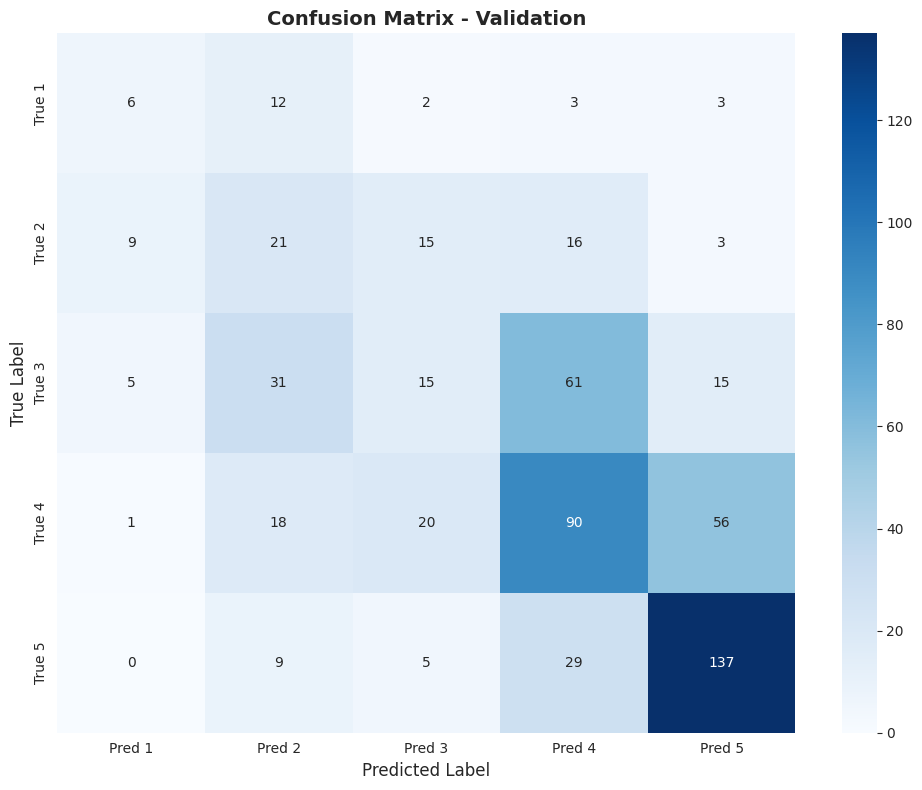

✓ Confusion matrix saved to /content/sample_data/model/confusion_matrix_validation.png

------------------------------------------------------------
TEST SET RESULTS
------------------------------------------------------------


Evaluating Test: 100%|██████████| 17/17 [00:00<00:00, 20.18it/s]



Classification Report (Test):
              precision    recall  f1-score   support

     Class 1     0.0000    0.0000    0.0000         9
     Class 2     0.3846    0.1786    0.2439        28
     Class 3     0.4118    0.2059    0.2745        34
     Class 4     0.2321    0.4815    0.3133        27
     Class 5     0.5333    0.7059    0.6076        34

    accuracy                         0.3712       132
   macro avg     0.3124    0.3144    0.2879       132
weighted avg     0.3725    0.3712    0.3430       132



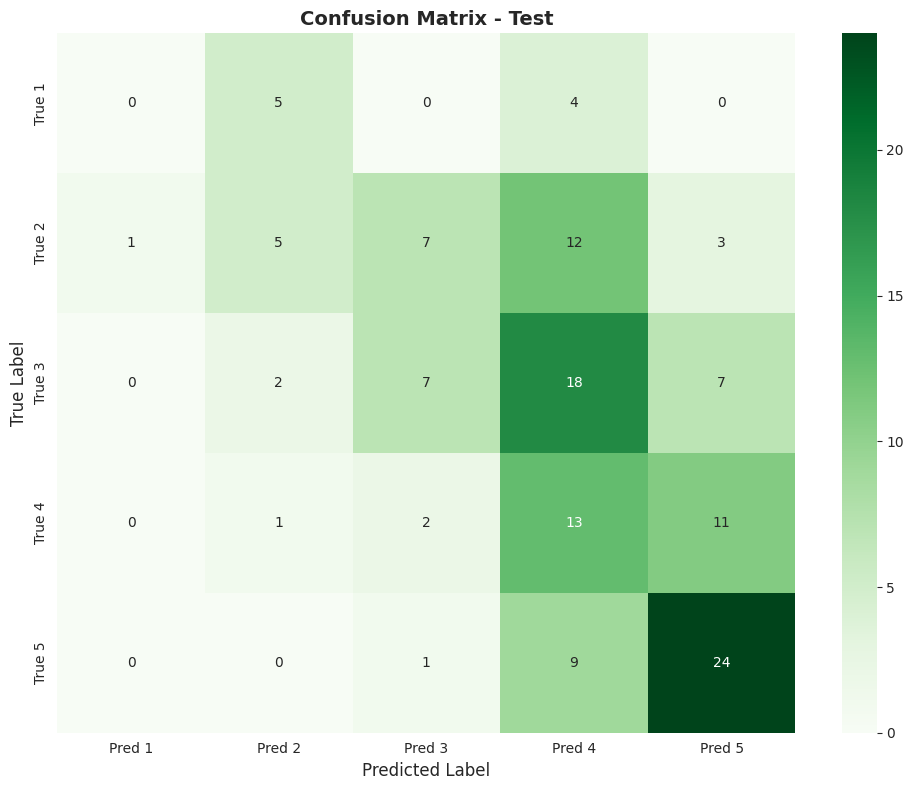

✓ Confusion matrix saved to /content/sample_data/model/confusion_matrix_test.png

ORDINAL EVALUATION METRICS

Validation Set:
  Exact Accuracy:     0.4622
  Within-1 Accuracy:  0.8625
  Within-2 Accuracy:  0.9674

Test Set:
  Exact Accuracy:     0.3712
  Within-1 Accuracy:  0.7879
  Within-2 Accuracy:  0.9470

PER-CLASS RECALL ANALYSIS

Recall by class:
----------------------------------------
Class      Validation      Test           
----------------------------------------
Class 1    0.2308          0.0000         
Class 2    0.3281          0.1786         
Class 3    0.1181          0.2059         
Class 4    0.4865          0.4815         
Class 5    0.7611          0.7059         

EVALUATION SUMMARY

Model: SZTAKI-HLT/hubert-base-cc
Model path: /content/sample_data/model/best_model.pt

Results:
  Validation:
    - Accuracy: 0.4622
    - Within-1: 0.8625
    - Within-2: 0.9674

  Test:
    - Accuracy: 0.3712
    - Within-1: 0.7879
    - Within-2: 0.9470

Figures saved to: /conten

In [ ]:
"""
HuBERT Model Evaluation Script

This script evaluates a trained HuBERT model on validation and test sets,
computing classification metrics, ordinal metrics, and generating visualizations.

This script should be run after 02a_hubert_train.py has completed training.

Input:
    - data/final/train.csv (for validation split)
    - data/final/test.csv
    - models/best_model.pt

Output:
    - models/confusion_matrix_validation.png
    - models/confusion_matrix_test.png
    - Console output with classification reports and metrics
"""

from typing import List, Dict, Tuple, Optional, Any
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from dataclasses import dataclass, field
from pathlib import Path
from tqdm import tqdm
import torch.nn as nn
import pandas as pd
import numpy as np
import warnings
import torch

from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
)

warnings.filterwarnings('ignore')


# =============================================================================
# CONFIGURATION
# =============================================================================

@dataclass
class EvalConfig:
    """Configuration for model evaluation."""

    # Model settings
    model_name: str = 'SZTAKI-HLT/hubert-base-cc'
    num_classes: int = 5
    max_length: int = 256

    # Data settings
    batch_size: int = 8
    val_split: float = 0.2
    random_seed: int = 42

    # Paths (stored as strings internally, converted via properties)
    _train_path: str = '_data/final/train.csv'
    _test_path: str = '_data/final/test.csv'
    _model_dir: str = 'models'
    _model_path: str = 'models/best_model.pt'

    @property
    def train_path(self) -> Path:
        """Get train_path as Path object."""
        return Path(self._train_path)

    @train_path.setter
    def train_path(self, value: Any) -> None:
        """Set train_path from string or Path."""
        self._train_path = str(value)

    @property
    def test_path(self) -> Path:
        """Get test_path as Path object."""
        return Path(self._test_path)

    @test_path.setter
    def test_path(self, value: Any) -> None:
        """Set test_path from string or Path."""
        self._test_path = str(value)

    @property
    def model_dir(self) -> Path:
        """Get model_dir as Path object."""
        return Path(self._model_dir)

    @model_dir.setter
    def model_dir(self, value: Any) -> None:
        """Set model_dir from string or Path."""
        self._model_dir = str(value)

    @property
    def model_path(self) -> Path:
        """Get model_path as Path object."""
        return Path(self._model_path)

    @model_path.setter
    def model_path(self, value: Any) -> None:
        """Set model_path from string or Path."""
        self._model_path = str(value)


# =============================================================================
# DATASET CLASS
# =============================================================================

class ASZFDataset(Dataset):
    """PyTorch Dataset for ÁSZF readability classification."""

    def __init__(self, encodings: Dict[str, List[Any]]):
        """
        Initialize the dataset.

        Args:
            encodings: Dictionary containing input_ids, attention_mask, and labels
        """
        self.encodings: Dict[str, List[Any]] = encodings

    def __len__(self) -> int:
        return len(self.encodings['labels'])

    def __getitem__(self, idx: int) -> Dict[str, torch.Tensor]:
        return {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx], dtype=torch.long),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx], dtype=torch.long),
            'labels': torch.tensor(self.encodings['labels'][idx] - 1, dtype=torch.long),  # Convert 1-5 to 0-4
        }


# =============================================================================
# DATA LOADER FOR EVALUATION
# =============================================================================

class EvalDataLoader:
    """Handles data loading for evaluation."""

    def __init__(self, config: EvalConfig):
        """
        Initialize the data loader.

        Args:
            config: Evaluation configuration
        """
        self.config: EvalConfig = config
        self.tokenizer: Optional[AutoTokenizer] = None
        self.class_weights: Optional[Dict[int, float]] = None

    def load_tokenizer(self) -> AutoTokenizer:
        """Load the tokenizer."""
        print(f"Loading tokenizer: {self.config.model_name}")
        self.tokenizer = AutoTokenizer.from_pretrained(self.config.model_name)
        print(f"✓ Tokenizer loaded")
        return self.tokenizer

    def tokenize_texts(
        self,
        texts: np.ndarray,
        labels: np.ndarray,
    ) -> Dict[str, List[Any]]:
        """Tokenize texts and prepare encodings."""
        encodings = self.tokenizer(
            texts.tolist(),
            max_length=self.config.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors=None,
        )

        return {
            'input_ids': encodings['input_ids'],
            'attention_mask': encodings['attention_mask'],
            'labels': labels.tolist(),
        }

    def prepare_dataloaders(self) -> Tuple[DataLoader, DataLoader, Dict[int, float]]:
        """
        Prepare validation and test dataloaders.

        Returns:
            Tuple of (val_loader, test_loader, class_weights)
        """
        print("=" * 60)
        print("PREPARING DATA FOR EVALUATION")
        print("=" * 60)

        # Load data
        df_train: pd.DataFrame = pd.read_csv(self.config.train_path)
        df_test: pd.DataFrame = pd.read_csv(self.config.test_path)

        print(f"\nTraining data: {df_train.shape}")
        print(f"Test data: {df_test.shape}")

        # Load tokenizer
        self.load_tokenizer()

        # Compute class weights
        unique_labels: np.ndarray = np.unique(df_train['label_numeric'])
        weights_array: np.ndarray = compute_class_weight(
            class_weight='balanced',
            classes=unique_labels,
            y=df_train['label_numeric'],
        )
        self.class_weights = dict(zip(unique_labels, weights_array))

        # Tokenize training data for validation split
        print("\nTokenizing data...")
        full_train_encodings: Dict[str, List[Any]] = self.tokenize_texts(
            df_train['text'].values,
            df_train['label_numeric'].values,
        )

        # Tokenize test data
        test_encodings: Dict[str, List[Any]] = self.tokenize_texts(
            df_test['text'].values,
            df_test['label_numeric'].values,
        )

        # Create validation split (same as training)
        _, val_indices = train_test_split(
            range(len(full_train_encodings['input_ids'])),
            test_size=self.config.val_split,
            random_state=self.config.random_seed,
            stratify=full_train_encodings['labels'],
        )

        val_encodings: Dict[str, List[Any]] = {
            'input_ids': [full_train_encodings['input_ids'][i] for i in val_indices],
            'attention_mask': [full_train_encodings['attention_mask'][i] for i in val_indices],
            'labels': [full_train_encodings['labels'][i] for i in val_indices],
        }

        print(f"\nDataset sizes:")
        print(f"  Validation: {len(val_encodings['input_ids'])} samples")
        print(f"  Test:       {len(test_encodings['input_ids'])} samples")

        # Create dataloaders
        val_dataset: ASZFDataset = ASZFDataset(val_encodings)
        test_dataset: ASZFDataset = ASZFDataset(test_encodings)

        val_loader: DataLoader = DataLoader(
            val_dataset,
            batch_size=self.config.batch_size,
            shuffle=False,
        )

        test_loader: DataLoader = DataLoader(
            test_dataset,
            batch_size=self.config.batch_size,
            shuffle=False,
        )

        print(f"\n✓ DataLoaders created")
        print(f"  Val batches:  {len(val_loader)}")
        print(f"  Test batches: {len(test_loader)}")

        return val_loader, test_loader, self.class_weights


# =============================================================================
# MODEL EVALUATOR
# =============================================================================

class ModelEvaluator:
    """
    Handles model evaluation and visualization.

    This class is responsible for:
        - Loading trained model
        - Evaluating on validation/test sets
        - Computing classification metrics
        - Computing ordinal evaluation metrics
        - Generating visualizations
    """

    def __init__(self, config: EvalConfig):
        """
        Initialize the evaluator.

        Args:
            config: Evaluation configuration
        """
        self.config: EvalConfig = config
        self.device: torch.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model: Optional[AutoModelForSequenceClassification] = None
        self.criterion: Optional[nn.CrossEntropyLoss] = None

    def load_model(self, class_weights: Dict[int, float]) -> None:
        """
        Load the trained model and set up criterion.

        Args:
            class_weights: Dictionary of class weights for loss function
        """
        print("\n" + "=" * 60)
        print("LOADING MODEL")
        print("=" * 60)

        print(f"\nDevice: {self.device}")
        print(f"Loading model from: {self.config.model_path}")

        # Initialize model architecture
        self.model = AutoModelForSequenceClassification.from_pretrained(
            self.config.model_name,
            num_labels=self.config.num_classes,
            problem_type="single_label_classification",
        )

        # Load trained weights
        checkpoint: Dict[str, Any] = torch.load(self.config.model_path, weights_only=False)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.model.to(self.device)

        print(f"✓ Model loaded from epoch {checkpoint['epoch']}")
        print(f"  Validation accuracy at save: {checkpoint['val_accuracy']:.4f}")

        # Set up criterion
        class_weights_list: List[float] = [class_weights[i] for i in range(1, 6)]
        class_weights_tensor: torch.Tensor = torch.tensor(
            class_weights_list,
            dtype=torch.float,
        ).to(self.device)

        self.criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

    def evaluate(
        self,
        dataloader: DataLoader,
        split_name: str,
    ) -> Tuple[float, float, np.ndarray, np.ndarray]:
        """
        Evaluate the model on a dataset.

        Args:
            dataloader: DataLoader for the dataset
            split_name: Name of the split (for logging)

        Returns:
            Tuple of (average_loss, accuracy, predictions, labels)
        """
        self.model.eval()

        total_loss: float = 0.0
        correct: int = 0
        total: int = 0
        all_predictions: List[int] = []
        all_labels: List[int] = []

        with torch.no_grad():
            for batch in tqdm(dataloader, desc=f'Evaluating {split_name}'):
                input_ids: torch.Tensor = batch['input_ids'].to(self.device)
                attention_mask: torch.Tensor = batch['attention_mask'].to(self.device)
                labels: torch.Tensor = batch['labels'].to(self.device)

                outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
                logits: torch.Tensor = outputs.logits

                loss: torch.Tensor = self.criterion(logits, labels)

                predictions: torch.Tensor = torch.argmax(logits, dim=1)
                correct += (predictions == labels).sum().item()
                total += labels.size(0)

                total_loss += loss.item()

                all_predictions.extend(predictions.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        avg_loss: float = total_loss / len(dataloader)
        accuracy: float = correct / total

        return avg_loss, accuracy, np.array(all_predictions), np.array(all_labels)

    @staticmethod
    def within_k_accuracy(true: np.ndarray, pred: np.ndarray, k: int = 1) -> float:
        """
        Calculate accuracy where prediction within k classes of true is correct.

        Args:
            true: True labels
            pred: Predicted labels
            k: Tolerance (default 1)

        Returns:
            Within-k accuracy
        """
        return float((np.abs(true - pred) <= k).mean())

    def print_classification_report(
        self,
        labels: np.ndarray,
        predictions: np.ndarray,
        split_name: str,
    ) -> None:
        """Print classification report for a dataset."""
        print(f"\nClassification Report ({split_name}):")
        print(classification_report(
            labels,
            predictions,
            target_names=[f'Class {i}' for i in range(1, 6)],
            digits=4,
        ))

    def print_ordinal_metrics(
        self,
        labels: np.ndarray,
        predictions: np.ndarray,
        split_name: str,
    ) -> None:
        """Print ordinal evaluation metrics."""
        print(f"\n{split_name}:")
        print(f"  Exact Accuracy:     {(predictions == labels).mean():.4f}")
        print(f"  Within-1 Accuracy:  {self.within_k_accuracy(labels, predictions, 1):.4f}")
        print(f"  Within-2 Accuracy:  {self.within_k_accuracy(labels, predictions, 2):.4f}")

    def print_per_class_recall(
        self,
        val_labels: np.ndarray,
        val_preds: np.ndarray,
        test_labels: np.ndarray,
        test_preds: np.ndarray,
    ) -> None:
        """Print per-class recall comparison."""
        print("\n" + "=" * 60)
        print("PER-CLASS RECALL ANALYSIS")
        print("=" * 60)

        print("\nRecall by class:")
        print("-" * 40)
        print(f"{'Class':<10} {'Validation':<15} {'Test':<15}")
        print("-" * 40)

        for c in range(5):
            val_mask: np.ndarray = val_labels == c
            test_mask: np.ndarray = test_labels == c

            val_recall: float = (val_preds[val_mask] == c).sum() / val_mask.sum() if val_mask.sum() > 0 else 0
            test_recall: float = (test_preds[test_mask] == c).sum() / test_mask.sum() if test_mask.sum() > 0 else 0

            print(f"Class {c+1:<4} {val_recall:<15.4f} {test_recall:<15.4f}")

    def plot_confusion_matrix(
        self,
        labels: np.ndarray,
        predictions: np.ndarray,
        split_name: str,
        cmap: str = 'Blues',
    ) -> None:
        """Plot and save confusion matrix."""
        import matplotlib.pyplot as plt
        import seaborn as sns

        sns.set_style("whitegrid")

        cm: np.ndarray = confusion_matrix(labels, predictions)

        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap=cmap,
            xticklabels=[f'Pred {i}' for i in range(1, 6)],
            yticklabels=[f'True {i}' for i in range(1, 6)],
        )
        plt.title(f'Confusion Matrix - {split_name}', fontsize=14, fontweight='bold')
        plt.ylabel('True Label', fontsize=12)
        plt.xlabel('Predicted Label', fontsize=12)
        plt.tight_layout()

        save_path: Path = self.config.model_dir / f'confusion_matrix_{split_name.lower().replace(" ", "_")}.png'
        plt.savefig(save_path, dpi=150)
        plt.show()

        print(f"✓ Confusion matrix saved to {save_path}")

    def full_evaluation(
        self,
        val_loader: DataLoader,
        test_loader: DataLoader,
    ) -> Dict[str, Any]:
        """
        Run full evaluation on validation and test sets.

        Args:
            val_loader: Validation DataLoader
            test_loader: Test DataLoader

        Returns:
            Dictionary with all evaluation results
        """
        print("\n" + "=" * 60)
        print("FINAL EVALUATION")
        print("=" * 60)

        # Validation evaluation
        print("\n" + "-" * 60)
        print("VALIDATION SET RESULTS")
        print("-" * 60)

        val_loss, val_acc, val_preds, val_labels = self.evaluate(val_loader, "Validation")
        self.print_classification_report(val_labels, val_preds, "Validation")
        self.plot_confusion_matrix(val_labels, val_preds, "Validation", cmap='Blues')

        # Test evaluation
        print("\n" + "-" * 60)
        print("TEST SET RESULTS")
        print("-" * 60)

        test_loss, test_acc, test_preds, test_labels = self.evaluate(test_loader, "Test")
        self.print_classification_report(test_labels, test_preds, "Test")
        self.plot_confusion_matrix(test_labels, test_preds, "Test", cmap='Greens')

        # Ordinal metrics
        print("\n" + "=" * 60)
        print("ORDINAL EVALUATION METRICS")
        print("=" * 60)

        self.print_ordinal_metrics(val_labels, val_preds, "Validation Set")
        self.print_ordinal_metrics(test_labels, test_preds, "Test Set")

        # Per-class recall
        self.print_per_class_recall(val_labels, val_preds, test_labels, test_preds)

        # Print summary
        self._print_summary(val_labels, val_preds, test_labels, test_preds)

        # Return results dictionary
        return {
            'validation': {
                'loss': val_loss,
                'accuracy': val_acc,
                'predictions': val_preds,
                'labels': val_labels,
                'within_1': self.within_k_accuracy(val_labels, val_preds, 1),
                'within_2': self.within_k_accuracy(val_labels, val_preds, 2),
            },
            'test': {
                'loss': test_loss,
                'accuracy': test_acc,
                'predictions': test_preds,
                'labels': test_labels,
                'within_1': self.within_k_accuracy(test_labels, test_preds, 1),
                'within_2': self.within_k_accuracy(test_labels, test_preds, 2),
            },
        }

    def _print_summary(
        self,
        val_labels: np.ndarray,
        val_preds: np.ndarray,
        test_labels: np.ndarray,
        test_preds: np.ndarray,
    ) -> None:
        """Print final evaluation summary."""
        print("\n" + "=" * 60)
        print("EVALUATION SUMMARY")
        print("=" * 60)

        print(f"""
Model: {self.config.model_name}
Model path: {self.config.model_path}

Results:
  Validation:
    - Accuracy: {(val_preds == val_labels).mean():.4f}
    - Within-1: {self.within_k_accuracy(val_labels, val_preds, 1):.4f}
    - Within-2: {self.within_k_accuracy(val_labels, val_preds, 2):.4f}

  Test:
    - Accuracy: {(test_preds == test_labels).mean():.4f}
    - Within-1: {self.within_k_accuracy(test_labels, test_preds, 1):.4f}
    - Within-2: {self.within_k_accuracy(test_labels, test_preds, 2):.4f}

Figures saved to: {self.config.model_dir}
""")


# =============================================================================
# MAIN
# =============================================================================

def main() -> None:
    """Main entry point for the evaluation script."""
    print("=" * 60)
    print("HUNGARIAN LEGAL TEXT READABILITY CLASSIFIER")
    print("Model Evaluation")
    print("=" * 60)

    # Initialize configuration
    config: EvalConfig = EvalConfig()

    config.train_path = '/content/sample_data/train.csv'
    config.test_path = '/content/sample_data/test.csv'
    config.model_dir = '/content/sample_data/model'
    config.model_path = '/content/sample_data/model/best_model.pt'

    print(f"\nConfiguration:")
    print(f"  Model: {config.model_name}")
    print(f"  Train path: {config.train_path}")
    print(f"  Test path: {config.test_path}")
    print(f"  Model path: {config.model_path}")

    # ==========================================================================
    # PREPARE DATA
    # ==========================================================================
    data_loader: EvalDataLoader = EvalDataLoader(config)
    val_loader, test_loader, class_weights = data_loader.prepare_dataloaders()

    # ==========================================================================
    # EVALUATE
    # ==========================================================================
    evaluator: ModelEvaluator = ModelEvaluator(config)
    evaluator.load_model(class_weights)
    results: Dict[str, Any] = evaluator.full_evaluation(val_loader, test_loader)

    print("\n" + "=" * 60)
    print("EVALUATION COMPLETE!")
    print("=" * 60)

    return results


if __name__ == '__main__':
    main()

In [3]:
"""
HuBERT Model Inference Script

This script runs inference on new, unseen Hungarian legal texts (ÁSZF)
using a trained HuBERT readability classification model.

Input:
    - models/best_model.pt (trained model)
    - Text data (embedded in script or provided via function)

Output:
    - Predicted readability scores (1-5) with confidence scores

Usage:
    python 02c_hubert_inference.py

    Or import and use programmatically:
        from 02c_hubert_inference import ReadabilityPredictor
        predictor = ReadabilityPredictor(model_path='path/to/model.pt')
        results = predictor.predict(["Your text here..."])
"""

from typing import List, Dict, Tuple, Optional, Any
from dataclasses import dataclass
from pathlib import Path
from datetime import datetime
import logging
import torch
import sys

from transformers import AutoModelForSequenceClassification, AutoTokenizer


# =============================================================================
# LOGGING SETUP
# =============================================================================

def setup_logger(
    name: str = "inference",
    level: int = logging.INFO,
    log_file: Optional[str] = None,
) -> logging.Logger:
    """
    Set up a logger with console and optional file output.

    Args:
        name: Logger name
        level: Logging level
        log_file: Optional path to log file

    Returns:
        Configured logger
    """
    logger: logging.Logger = logging.getLogger(name)
    logger.setLevel(level)

    # Clear existing handlers
    logger.handlers = []

    # Console handler
    console_handler: logging.StreamHandler = logging.StreamHandler(sys.stdout)
    console_handler.setLevel(level)

    # Formatter
    formatter: logging.Formatter = logging.Formatter(
        fmt='%(asctime)s | %(levelname)-8s | %(message)s',
        datefmt='%Y-%m-%d %H:%M:%S',
    )
    console_handler.setFormatter(formatter)
    logger.addHandler(console_handler)

    # File handler (optional)
    if log_file:
        file_handler: logging.FileHandler = logging.FileHandler(log_file)
        file_handler.setLevel(level)
        file_handler.setFormatter(formatter)
        logger.addHandler(file_handler)

    return logger


# =============================================================================
# CONFIGURATION
# =============================================================================

@dataclass
class InferenceConfig:
    """Configuration for inference."""

    # Model settings
    model_name: str = 'SZTAKI-HLT/hubert-base-cc'
    num_classes: int = 5
    max_length: int = 256

    # Paths
    _model_path: str = 'models/best_model.pt'

    # Label descriptions (Hungarian)
    label_descriptions: Dict[int, str] = None

    def __post_init__(self) -> None:
        """Initialize label descriptions."""
        self.label_descriptions = {
            1: "Nagyon nehezen érthető (Very difficult)",
            2: "Nehezen érthető (Difficult)",
            3: "Többé-kevésbé érthető (Somewhat understandable)",
            4: "Érthető (Understandable)",
            5: "Könnyen érthető (Easily understandable)",
        }

    @property
    def model_path(self) -> Path:
        """Get model_path as Path object."""
        return Path(self._model_path)

    @model_path.setter
    def model_path(self, value: Any) -> None:
        """Set model_path from string or Path."""
        self._model_path = str(value)


# =============================================================================
# SAMPLE DATA
# =============================================================================

# Real-life Hungarian ÁSZF (Terms and Conditions) sample texts
# These represent various difficulty levels typical in legal documents

SAMPLE_TEXTS: List[Dict[str, Any]] = [
    {
        "id": 1,
        "text": "A szolgáltatás díja havi 1000 Ft.",
        "description": "Simple pricing statement",
        "expected_difficulty": "easy",
    },
    {
        "id": 2,
        "text": "A szerződés határozatlan időre jön létre és bármelyik fél 30 napos felmondási idővel megszüntetheti.",
        "description": "Basic contract term",
        "expected_difficulty": "easy",
    },
    {
        "id": 3,
        "text": "Az Ügyfél a szerződéstől a termék átvételétől számított 14 napon belül indokolás nélkül elállhat. Az elállási jog gyakorlása esetén az Ügyfél köteles a terméket haladéktalanul, de legkésőbb 14 napon belül visszaküldeni.",
        "description": "Consumer withdrawal rights",
        "expected_difficulty": "medium",
    },
    {
        "id": 4,
        "text": "A Szolgáltató fenntartja a jogot az Általános Szerződési Feltételek egyoldalú módosítására. A módosításról a Szolgáltató a hatálybalépést megelőzően legalább 15 nappal korábban értesíti az Előfizetőt elektronikus úton.",
        "description": "Terms modification clause",
        "expected_difficulty": "medium",
    },
    {
        "id": 5,
        "text": "A Ptk. 6:78. § (1) bekezdése alapján a fogyasztó és a vállalkozás közötti szerződésben semmis az a kikötés, amely a fogyasztóval szerződő vállalkozás javára egyoldalúan és indokolatlanul hátrányos a fogyasztóra nézve.",
        "description": "Legal reference to Civil Code",
        "expected_difficulty": "hard",
    },
    {
        "id": 6,
        "text": "Amennyiben a Felhasználó a jelen ÁSZF-ben foglalt kötelezettségeit megszegi, különös tekintettel a szellemi tulajdonjogok megsértésére, a Szolgáltató jogosult a Felhasználó hozzáférését azonnali hatállyal felfüggeszteni vagy megszüntetni, és a Felhasználóval szemben kártérítési igényt érvényesíteni a Ptk. vonatkozó rendelkezései szerint.",
        "description": "IP violation consequences",
        "expected_difficulty": "hard",
    },
    {
        "id": 7,
        "text": "A Szolgáltató a szerződésszegéssel okozott károkért való felelősségét – a szándékosan okozott, illetve emberi életet, testi épséget vagy egészséget megkárosító szerződésszegésért való felelősség kivételével – az adott szolgáltatás egyéves díjának összegében korlátozza.",
        "description": "Liability limitation clause",
        "expected_difficulty": "hard",
    },
    {
        "id": 8,
        "text": "Adatkezelő: XY Kft. (székhely: 1234 Budapest, Példa utca 1.) Az adatkezelés célja: szerződés teljesítése. Az adatkezelés jogalapja: GDPR 6. cikk (1) bekezdés b) pont.",
        "description": "GDPR data controller info",
        "expected_difficulty": "medium",
    },
    {
        "id": 9,
        "text": "A felek a jelen szerződésből eredő vitáikat elsődlegesen békés úton, egyeztetéssel kísérlik meg rendezni. Ennek eredménytelensége esetén a felek kikötik a Budapesti II. és III. Kerületi Bíróság kizárólagos illetékességét.",
        "description": "Dispute resolution clause",
        "expected_difficulty": "medium",
    },
    {
        "id": 10,
        "text": "Az Előfizető tudomásul veszi, hogy az Eszr. 11. § (1) bekezdésében meghatározott, a szerződéskötést megelőző tájékoztatási kötelezettség teljesítése a Szolgáltató részéről az ÁSZF Előfizető részére történő hozzáférhetővé tételével megtörténik, amennyiben az ÁSZF tartalmazza az Eszr. 11. § (1) bekezdésében előírt információkat.",
        "description": "Complex regulatory reference",
        "expected_difficulty": "very_hard",
    },
]


# =============================================================================
# PREDICTOR CLASS
# =============================================================================

class ReadabilityPredictor:
    """
    Predicts readability scores for Hungarian legal texts.

    This class loads a trained HuBERT model and provides methods
    for predicting readability scores on new texts.
    """

    def __init__(
        self,
        model_path: Optional[str] = None,
        config: Optional[InferenceConfig] = None,
        logger: Optional[logging.Logger] = None,
    ):
        """
        Initialize the predictor.

        Args:
            model_path: Path to trained model (overrides config)
            config: Inference configuration
            logger: Logger instance
        """
        self.config: InferenceConfig = config or InferenceConfig()

        if model_path:
            self.config.model_path = model_path

        self.logger: logging.Logger = logger or setup_logger()
        self.device: torch.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        self.model: Optional[AutoModelForSequenceClassification] = None
        self.tokenizer: Optional[AutoTokenizer] = None

        self._load_model()

    def _load_model(self) -> None:
        """Load the model and tokenizer."""
        self.logger.info(f"Loading model from: {self.config.model_path}")
        self.logger.info(f"Device: {self.device}")

        # Load tokenizer
        self.logger.info(f"Loading tokenizer: {self.config.model_name}")
        self.tokenizer = AutoTokenizer.from_pretrained(self.config.model_name)

        # Initialize model architecture
        self.model = AutoModelForSequenceClassification.from_pretrained(
            self.config.model_name,
            num_labels=self.config.num_classes,
            problem_type="single_label_classification",
        )

        # Load trained weights
        checkpoint: Dict[str, Any] = torch.load(
            self.config.model_path,
            map_location=self.device,
            weights_only=False,
        )
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.model.to(self.device)
        self.model.eval()

        self.logger.info(f"Model loaded successfully (trained epoch: {checkpoint['epoch']})")

    def predict_single(self, text: str) -> Dict[str, Any]:
        """
        Predict readability for a single text.

        Args:
            text: Input text

        Returns:
            Dictionary with prediction results
        """
        # Tokenize
        encoding = self.tokenizer(
            text,
            max_length=self.config.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt',
        )

        # Move to device
        input_ids: torch.Tensor = encoding['input_ids'].to(self.device)
        attention_mask: torch.Tensor = encoding['attention_mask'].to(self.device)

        # Predict
        with torch.no_grad():
            outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
            logits: torch.Tensor = outputs.logits
            probabilities: torch.Tensor = torch.softmax(logits, dim=1)

        # Get prediction (convert back from 0-4 to 1-5)
        predicted_class: int = int(torch.argmax(probabilities, dim=1).item()) + 1
        confidence: float = float(probabilities.max().item())
        all_probs: List[float] = probabilities.squeeze().cpu().tolist()

        return {
            'text': text[:100] + '...' if len(text) > 100 else text,
            'text_length': len(text),
            'predicted_label': predicted_class,
            'label_description': self.config.label_descriptions[predicted_class],
            'confidence': confidence,
            'probabilities': {i + 1: float(p) for i, p in enumerate(all_probs)},
        }

    def predict(self, texts: List[str]) -> List[Dict[str, Any]]:
        """
        Predict readability for multiple texts.

        Args:
            texts: List of input texts

        Returns:
            List of prediction dictionaries
        """
        self.logger.info(f"Running inference on {len(texts)} texts...")

        results: List[Dict[str, Any]] = []

        for i, text in enumerate(texts):
            result: Dict[str, Any] = self.predict_single(text)
            result['index'] = i
            results.append(result)

        self.logger.info(f"Inference complete")

        return results

    def predict_batch(
        self,
        texts: List[str],
        batch_size: int = 8,
    ) -> List[Dict[str, Any]]:
        """
        Predict readability for multiple texts using batched inference.

        Args:
            texts: List of input texts
            batch_size: Batch size for inference

        Returns:
            List of prediction dictionaries
        """
        self.logger.info(f"Running batched inference on {len(texts)} texts (batch_size={batch_size})...")

        results: List[Dict[str, Any]] = []

        for batch_start in range(0, len(texts), batch_size):
            batch_texts: List[str] = texts[batch_start:batch_start + batch_size]

            # Tokenize batch
            encodings = self.tokenizer(
                batch_texts,
                max_length=self.config.max_length,
                padding='max_length',
                truncation=True,
                return_tensors='pt',
            )

            input_ids: torch.Tensor = encodings['input_ids'].to(self.device)
            attention_mask: torch.Tensor = encodings['attention_mask'].to(self.device)

            # Predict
            with torch.no_grad():
                outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
                logits: torch.Tensor = outputs.logits
                probabilities: torch.Tensor = torch.softmax(logits, dim=1)

            # Process results
            predicted_classes: torch.Tensor = torch.argmax(probabilities, dim=1) + 1
            confidences: torch.Tensor = probabilities.max(dim=1).values

            for i, (text, pred, conf, probs) in enumerate(zip(
                batch_texts,
                predicted_classes.cpu().tolist(),
                confidences.cpu().tolist(),
                probabilities.cpu().tolist(),
            )):
                results.append({
                    'index': batch_start + i,
                    'text': text[:100] + '...' if len(text) > 100 else text,
                    'text_length': len(text),
                    'predicted_label': pred,
                    'label_description': self.config.label_descriptions[pred],
                    'confidence': conf,
                    'probabilities': {j + 1: float(p) for j, p in enumerate(probs)},
                })

        self.logger.info(f"Batched inference complete")

        return results


# =============================================================================
# RESULT FORMATTING
# =============================================================================

def print_results(
    results: List[Dict[str, Any]],
    logger: logging.Logger,
    show_probabilities: bool = False,
) -> None:
    """
    Print prediction results in a formatted way.

    Args:
        results: List of prediction dictionaries
        logger: Logger instance
        show_probabilities: Whether to show full probability distribution
    """
    logger.info("=" * 70)
    logger.info("PREDICTION RESULTS")
    logger.info("=" * 70)

    for result in results:
        logger.info("")
        logger.info(f"[Text {result['index'] + 1}] {result['text']}")
        logger.info(f"  Length: {result['text_length']} chars")
        logger.info(f"  Prediction: {result['predicted_label']} - {result['label_description']}")
        logger.info(f"  Confidence: {result['confidence']:.2%}")

        if show_probabilities:
            prob_str: str = " | ".join([
                f"L{k}: {v:.1%}" for k, v in result['probabilities'].items()
            ])
            logger.info(f"  Probabilities: {prob_str}")

    # Summary statistics
    logger.info("")
    logger.info("=" * 70)
    logger.info("SUMMARY")
    logger.info("=" * 70)

    predictions: List[int] = [r['predicted_label'] for r in results]
    confidences: List[float] = [r['confidence'] for r in results]

    logger.info(f"Total texts: {len(results)}")
    logger.info(f"Average confidence: {sum(confidences) / len(confidences):.2%}")
    logger.info("")
    logger.info("Label distribution:")

    for label in range(1, 6):
        count: int = predictions.count(label)
        pct: float = count / len(predictions) * 100
        logger.info(f"  Label {label}: {count} ({pct:.1f}%)")


# =============================================================================
# MAIN
# =============================================================================

def predict() -> List[Dict[str, Any]]:
    """
    Run inference on sample data.

    Returns:
        List of prediction results
    """
    logger: logging.Logger = setup_logger()

    logger.info("=" * 70)
    logger.info("HUNGARIAN LEGAL TEXT READABILITY CLASSIFIER")
    logger.info("Inference Script")
    logger.info("=" * 70)

    # Configuration
    config: InferenceConfig = InferenceConfig()

    config.model_path = '/content/sample_data/model/best_model.pt'

    logger.info(f"Model path: {config.model_path}")

    # Initialize predictor
    predictor: ReadabilityPredictor = ReadabilityPredictor(config=config, logger=logger)

    # Extract texts from sample data
    texts: List[str] = [sample['text'] for sample in SAMPLE_TEXTS]

    logger.info("")
    logger.info(f"Sample texts to classify: {len(texts)}")

    # Show sample data info
    logger.info("")
    logger.info("Sample data overview:")
    for sample in SAMPLE_TEXTS:
        logger.info(f"  [{sample['id']}] {sample['description']} (expected: {sample['expected_difficulty']})")

    # Run inference
    logger.info("")
    results: List[Dict[str, Any]] = predictor.predict_batch(texts)

    # Print results
    print_results(results, logger, show_probabilities=True)

    # Compare with expected difficulty
    logger.info("")
    logger.info("=" * 70)
    logger.info("COMPARISON WITH EXPECTED DIFFICULTY")
    logger.info("=" * 70)
    logger.info("")

    difficulty_mapping: Dict[str, str] = {
        'easy': '4-5 (Érthető/Könnyen érthető)',
        'medium': '3 (Többé-kevésbé érthető)',
        'hard': '2 (Nehezen érthető)',
        'very_hard': '1 (Nagyon nehezen érthető)',
    }

    for sample, result in zip(SAMPLE_TEXTS, results):
        expected: str = sample['expected_difficulty']
        predicted: int = result['predicted_label']

        logger.info(f"Text {sample['id']}: {sample['description']}")
        logger.info(f"  Expected: {expected} → {difficulty_mapping[expected]}")
        logger.info(f"  Predicted: {predicted} - {result['label_description']}")
        logger.info("")

    logger.info("=" * 70)
    logger.info("INFERENCE COMPLETE")
    logger.info("=" * 70)

    return results


if __name__ == "__main__":
    predict()

2025-12-06 15:56:36 | INFO     | ======================================================================


INFO:inference:======================================================================


2025-12-06 15:56:36 | INFO     | HUNGARIAN LEGAL TEXT READABILITY CLASSIFIER


INFO:inference:HUNGARIAN LEGAL TEXT READABILITY CLASSIFIER


2025-12-06 15:56:36 | INFO     | Inference Script


INFO:inference:Inference Script


2025-12-06 15:56:36 | INFO     | ======================================================================


INFO:inference:======================================================================


2025-12-06 15:56:36 | INFO     | Model path: /content/sample_data/model/best_model.pt


INFO:inference:Model path: /content/sample_data/model/best_model.pt


2025-12-06 15:56:36 | INFO     | Loading model from: /content/sample_data/model/best_model.pt


INFO:inference:Loading model from: /content/sample_data/model/best_model.pt


2025-12-06 15:56:36 | INFO     | Device: cuda


INFO:inference:Device: cuda


2025-12-06 15:56:36 | INFO     | Loading tokenizer: SZTAKI-HLT/hubert-base-cc


INFO:inference:Loading tokenizer: SZTAKI-HLT/hubert-base-cc
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at SZTAKI-HLT/hubert-base-cc and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2025-12-06 15:56:39 | INFO     | Model loaded successfully (trained epoch: 4)


INFO:inference:Model loaded successfully (trained epoch: 4)


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | Sample texts to classify: 10


INFO:inference:Sample texts to classify: 10


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | Sample data overview:


INFO:inference:Sample data overview:


2025-12-06 15:56:39 | INFO     |   [1] Simple pricing statement (expected: easy)


INFO:inference:  [1] Simple pricing statement (expected: easy)


2025-12-06 15:56:39 | INFO     |   [2] Basic contract term (expected: easy)


INFO:inference:  [2] Basic contract term (expected: easy)


2025-12-06 15:56:39 | INFO     |   [3] Consumer withdrawal rights (expected: medium)


INFO:inference:  [3] Consumer withdrawal rights (expected: medium)


2025-12-06 15:56:39 | INFO     |   [4] Terms modification clause (expected: medium)


INFO:inference:  [4] Terms modification clause (expected: medium)


2025-12-06 15:56:39 | INFO     |   [5] Legal reference to Civil Code (expected: hard)


INFO:inference:  [5] Legal reference to Civil Code (expected: hard)


2025-12-06 15:56:39 | INFO     |   [6] IP violation consequences (expected: hard)


INFO:inference:  [6] IP violation consequences (expected: hard)


2025-12-06 15:56:39 | INFO     |   [7] Liability limitation clause (expected: hard)


INFO:inference:  [7] Liability limitation clause (expected: hard)


2025-12-06 15:56:39 | INFO     |   [8] GDPR data controller info (expected: medium)


INFO:inference:  [8] GDPR data controller info (expected: medium)


2025-12-06 15:56:39 | INFO     |   [9] Dispute resolution clause (expected: medium)


INFO:inference:  [9] Dispute resolution clause (expected: medium)


2025-12-06 15:56:39 | INFO     |   [10] Complex regulatory reference (expected: very_hard)


INFO:inference:  [10] Complex regulatory reference (expected: very_hard)


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | Running batched inference on 10 texts (batch_size=8)...


INFO:inference:Running batched inference on 10 texts (batch_size=8)...


2025-12-06 15:56:39 | INFO     | Batched inference complete


INFO:inference:Batched inference complete


2025-12-06 15:56:39 | INFO     | ======================================================================


INFO:inference:======================================================================


2025-12-06 15:56:39 | INFO     | PREDICTION RESULTS


INFO:inference:PREDICTION RESULTS


2025-12-06 15:56:39 | INFO     | ======================================================================


INFO:inference:======================================================================


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | [Text 1] A szolgáltatás díja havi 1000 Ft.


INFO:inference:[Text 1] A szolgáltatás díja havi 1000 Ft.


2025-12-06 15:56:39 | INFO     |   Length: 33 chars


INFO:inference:  Length: 33 chars


2025-12-06 15:56:39 | INFO     |   Prediction: 5 - Könnyen érthető (Easily understandable)


INFO:inference:  Prediction: 5 - Könnyen érthető (Easily understandable)


2025-12-06 15:56:39 | INFO     |   Confidence: 89.05%


INFO:inference:  Confidence: 89.05%


2025-12-06 15:56:39 | INFO     |   Probabilities: L1: 1.3% | L2: 1.7% | L3: 1.1% | L4: 6.9% | L5: 89.0%


INFO:inference:  Probabilities: L1: 1.3% | L2: 1.7% | L3: 1.1% | L4: 6.9% | L5: 89.0%


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | [Text 2] A szerződés határozatlan időre jön létre és bármelyik fél 30 napos felmondási idővel megszüntetheti.


INFO:inference:[Text 2] A szerződés határozatlan időre jön létre és bármelyik fél 30 napos felmondási idővel megszüntetheti.


2025-12-06 15:56:39 | INFO     |   Length: 100 chars


INFO:inference:  Length: 100 chars


2025-12-06 15:56:39 | INFO     |   Prediction: 5 - Könnyen érthető (Easily understandable)


INFO:inference:  Prediction: 5 - Könnyen érthető (Easily understandable)


2025-12-06 15:56:39 | INFO     |   Confidence: 88.33%


INFO:inference:  Confidence: 88.33%


2025-12-06 15:56:39 | INFO     |   Probabilities: L1: 0.9% | L2: 1.2% | L3: 1.1% | L4: 8.4% | L5: 88.3%


INFO:inference:  Probabilities: L1: 0.9% | L2: 1.2% | L3: 1.1% | L4: 8.4% | L5: 88.3%


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | [Text 3] Az Ügyfél a szerződéstől a termék átvételétől számított 14 napon belül indokolás nélkül elállhat. Az...


INFO:inference:[Text 3] Az Ügyfél a szerződéstől a termék átvételétől számított 14 napon belül indokolás nélkül elállhat. Az...


2025-12-06 15:56:39 | INFO     |   Length: 219 chars


INFO:inference:  Length: 219 chars


2025-12-06 15:56:39 | INFO     |   Prediction: 5 - Könnyen érthető (Easily understandable)


INFO:inference:  Prediction: 5 - Könnyen érthető (Easily understandable)


2025-12-06 15:56:39 | INFO     |   Confidence: 64.06%


INFO:inference:  Confidence: 64.06%


2025-12-06 15:56:39 | INFO     |   Probabilities: L1: 0.7% | L2: 1.7% | L3: 2.8% | L4: 30.7% | L5: 64.1%


INFO:inference:  Probabilities: L1: 0.7% | L2: 1.7% | L3: 2.8% | L4: 30.7% | L5: 64.1%


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | [Text 4] A Szolgáltató fenntartja a jogot az Általános Szerződési Feltételek egyoldalú módosítására. A módosí...


INFO:inference:[Text 4] A Szolgáltató fenntartja a jogot az Általános Szerződési Feltételek egyoldalú módosítására. A módosí...


2025-12-06 15:56:39 | INFO     |   Length: 218 chars


INFO:inference:  Length: 218 chars


2025-12-06 15:56:39 | INFO     |   Prediction: 5 - Könnyen érthető (Easily understandable)


INFO:inference:  Prediction: 5 - Könnyen érthető (Easily understandable)


2025-12-06 15:56:39 | INFO     |   Confidence: 73.67%


INFO:inference:  Confidence: 73.67%


2025-12-06 15:56:39 | INFO     |   Probabilities: L1: 0.6% | L2: 1.1% | L3: 1.7% | L4: 22.9% | L5: 73.7%


INFO:inference:  Probabilities: L1: 0.6% | L2: 1.1% | L3: 1.7% | L4: 22.9% | L5: 73.7%


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | [Text 5] A Ptk. 6:78. § (1) bekezdése alapján a fogyasztó és a vállalkozás közötti szerződésben semmis az a k...


INFO:inference:[Text 5] A Ptk. 6:78. § (1) bekezdése alapján a fogyasztó és a vállalkozás közötti szerződésben semmis az a k...


2025-12-06 15:56:39 | INFO     |   Length: 217 chars


INFO:inference:  Length: 217 chars


2025-12-06 15:56:39 | INFO     |   Prediction: 4 - Érthető (Understandable)


INFO:inference:  Prediction: 4 - Érthető (Understandable)


2025-12-06 15:56:39 | INFO     |   Confidence: 35.21%


INFO:inference:  Confidence: 35.21%


2025-12-06 15:56:39 | INFO     |   Probabilities: L1: 12.5% | L2: 24.9% | L3: 18.0% | L4: 35.2% | L5: 9.4%


INFO:inference:  Probabilities: L1: 12.5% | L2: 24.9% | L3: 18.0% | L4: 35.2% | L5: 9.4%


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | [Text 6] Amennyiben a Felhasználó a jelen ÁSZF-ben foglalt kötelezettségeit megszegi, különös tekintettel a s...


INFO:inference:[Text 6] Amennyiben a Felhasználó a jelen ÁSZF-ben foglalt kötelezettségeit megszegi, különös tekintettel a s...


2025-12-06 15:56:39 | INFO     |   Length: 339 chars


INFO:inference:  Length: 339 chars


2025-12-06 15:56:39 | INFO     |   Prediction: 4 - Érthető (Understandable)


INFO:inference:  Prediction: 4 - Érthető (Understandable)


2025-12-06 15:56:39 | INFO     |   Confidence: 40.69%


INFO:inference:  Confidence: 40.69%


2025-12-06 15:56:39 | INFO     |   Probabilities: L1: 1.9% | L2: 17.3% | L3: 33.7% | L4: 40.7% | L5: 6.4%


INFO:inference:  Probabilities: L1: 1.9% | L2: 17.3% | L3: 33.7% | L4: 40.7% | L5: 6.4%


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | [Text 7] A Szolgáltató a szerződésszegéssel okozott károkért való felelősségét – a szándékosan okozott, illet...


INFO:inference:[Text 7] A Szolgáltató a szerződésszegéssel okozott károkért való felelősségét – a szándékosan okozott, illet...


2025-12-06 15:56:39 | INFO     |   Length: 269 chars


INFO:inference:  Length: 269 chars


2025-12-06 15:56:39 | INFO     |   Prediction: 4 - Érthető (Understandable)


INFO:inference:  Prediction: 4 - Érthető (Understandable)


2025-12-06 15:56:39 | INFO     |   Confidence: 48.56%


INFO:inference:  Confidence: 48.56%


2025-12-06 15:56:39 | INFO     |   Probabilities: L1: 1.7% | L2: 12.6% | L3: 26.0% | L4: 48.6% | L5: 11.2%


INFO:inference:  Probabilities: L1: 1.7% | L2: 12.6% | L3: 26.0% | L4: 48.6% | L5: 11.2%


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | [Text 8] Adatkezelő: XY Kft. (székhely: 1234 Budapest, Példa utca 1.) Az adatkezelés célja: szerződés teljesí...


INFO:inference:[Text 8] Adatkezelő: XY Kft. (székhely: 1234 Budapest, Példa utca 1.) Az adatkezelés célja: szerződés teljesí...


2025-12-06 15:56:39 | INFO     |   Length: 166 chars


INFO:inference:  Length: 166 chars


2025-12-06 15:56:39 | INFO     |   Prediction: 5 - Könnyen érthető (Easily understandable)


INFO:inference:  Prediction: 5 - Könnyen érthető (Easily understandable)


2025-12-06 15:56:39 | INFO     |   Confidence: 56.90%


INFO:inference:  Confidence: 56.90%


2025-12-06 15:56:39 | INFO     |   Probabilities: L1: 1.4% | L2: 2.9% | L3: 4.8% | L4: 33.9% | L5: 56.9%


INFO:inference:  Probabilities: L1: 1.4% | L2: 2.9% | L3: 4.8% | L4: 33.9% | L5: 56.9%


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | [Text 9] A felek a jelen szerződésből eredő vitáikat elsődlegesen békés úton, egyeztetéssel kísérlik meg rend...


INFO:inference:[Text 9] A felek a jelen szerződésből eredő vitáikat elsődlegesen békés úton, egyeztetéssel kísérlik meg rend...


2025-12-06 15:56:39 | INFO     |   Length: 221 chars


INFO:inference:  Length: 221 chars


2025-12-06 15:56:39 | INFO     |   Prediction: 5 - Könnyen érthető (Easily understandable)


INFO:inference:  Prediction: 5 - Könnyen érthető (Easily understandable)


2025-12-06 15:56:39 | INFO     |   Confidence: 53.26%


INFO:inference:  Confidence: 53.26%


2025-12-06 15:56:39 | INFO     |   Probabilities: L1: 2.5% | L2: 5.2% | L3: 5.6% | L4: 33.4% | L5: 53.3%


INFO:inference:  Probabilities: L1: 2.5% | L2: 5.2% | L3: 5.6% | L4: 33.4% | L5: 53.3%


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | [Text 10] Az Előfizető tudomásul veszi, hogy az Eszr. 11. § (1) bekezdésében meghatározott, a szerződéskötést ...


INFO:inference:[Text 10] Az Előfizető tudomásul veszi, hogy az Eszr. 11. § (1) bekezdésében meghatározott, a szerződéskötést ...


2025-12-06 15:56:39 | INFO     |   Length: 328 chars


INFO:inference:  Length: 328 chars


2025-12-06 15:56:39 | INFO     |   Prediction: 2 - Nehezen érthető (Difficult)


INFO:inference:  Prediction: 2 - Nehezen érthető (Difficult)


2025-12-06 15:56:39 | INFO     |   Confidence: 36.14%


INFO:inference:  Confidence: 36.14%


2025-12-06 15:56:39 | INFO     |   Probabilities: L1: 4.0% | L2: 36.1% | L3: 21.4% | L4: 30.9% | L5: 7.5%


INFO:inference:  Probabilities: L1: 4.0% | L2: 36.1% | L3: 21.4% | L4: 30.9% | L5: 7.5%


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | ======================================================================


INFO:inference:======================================================================


2025-12-06 15:56:39 | INFO     | SUMMARY


INFO:inference:SUMMARY


2025-12-06 15:56:39 | INFO     | ======================================================================


INFO:inference:======================================================================


2025-12-06 15:56:39 | INFO     | Total texts: 10


INFO:inference:Total texts: 10


2025-12-06 15:56:39 | INFO     | Average confidence: 58.59%


INFO:inference:Average confidence: 58.59%


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | Label distribution:


INFO:inference:Label distribution:


2025-12-06 15:56:39 | INFO     |   Label 1: 0 (0.0%)


INFO:inference:  Label 1: 0 (0.0%)


2025-12-06 15:56:39 | INFO     |   Label 2: 1 (10.0%)


INFO:inference:  Label 2: 1 (10.0%)


2025-12-06 15:56:39 | INFO     |   Label 3: 0 (0.0%)


INFO:inference:  Label 3: 0 (0.0%)


2025-12-06 15:56:39 | INFO     |   Label 4: 3 (30.0%)


INFO:inference:  Label 4: 3 (30.0%)


2025-12-06 15:56:39 | INFO     |   Label 5: 6 (60.0%)


INFO:inference:  Label 5: 6 (60.0%)


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | ======================================================================


INFO:inference:======================================================================


2025-12-06 15:56:39 | INFO     | COMPARISON WITH EXPECTED DIFFICULTY


INFO:inference:COMPARISON WITH EXPECTED DIFFICULTY


2025-12-06 15:56:39 | INFO     | ======================================================================


INFO:inference:======================================================================


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | Text 1: Simple pricing statement


INFO:inference:Text 1: Simple pricing statement


2025-12-06 15:56:39 | INFO     |   Expected: easy → 4-5 (Érthető/Könnyen érthető)


INFO:inference:  Expected: easy → 4-5 (Érthető/Könnyen érthető)


2025-12-06 15:56:39 | INFO     |   Predicted: 5 - Könnyen érthető (Easily understandable)


INFO:inference:  Predicted: 5 - Könnyen érthető (Easily understandable)


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | Text 2: Basic contract term


INFO:inference:Text 2: Basic contract term


2025-12-06 15:56:39 | INFO     |   Expected: easy → 4-5 (Érthető/Könnyen érthető)


INFO:inference:  Expected: easy → 4-5 (Érthető/Könnyen érthető)


2025-12-06 15:56:39 | INFO     |   Predicted: 5 - Könnyen érthető (Easily understandable)


INFO:inference:  Predicted: 5 - Könnyen érthető (Easily understandable)


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | Text 3: Consumer withdrawal rights


INFO:inference:Text 3: Consumer withdrawal rights


2025-12-06 15:56:39 | INFO     |   Expected: medium → 3 (Többé-kevésbé érthető)


INFO:inference:  Expected: medium → 3 (Többé-kevésbé érthető)


2025-12-06 15:56:39 | INFO     |   Predicted: 5 - Könnyen érthető (Easily understandable)


INFO:inference:  Predicted: 5 - Könnyen érthető (Easily understandable)


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | Text 4: Terms modification clause


INFO:inference:Text 4: Terms modification clause


2025-12-06 15:56:39 | INFO     |   Expected: medium → 3 (Többé-kevésbé érthető)


INFO:inference:  Expected: medium → 3 (Többé-kevésbé érthető)


2025-12-06 15:56:39 | INFO     |   Predicted: 5 - Könnyen érthető (Easily understandable)


INFO:inference:  Predicted: 5 - Könnyen érthető (Easily understandable)


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | Text 5: Legal reference to Civil Code


INFO:inference:Text 5: Legal reference to Civil Code


2025-12-06 15:56:39 | INFO     |   Expected: hard → 2 (Nehezen érthető)


INFO:inference:  Expected: hard → 2 (Nehezen érthető)


2025-12-06 15:56:39 | INFO     |   Predicted: 4 - Érthető (Understandable)


INFO:inference:  Predicted: 4 - Érthető (Understandable)


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | Text 6: IP violation consequences


INFO:inference:Text 6: IP violation consequences


2025-12-06 15:56:39 | INFO     |   Expected: hard → 2 (Nehezen érthető)


INFO:inference:  Expected: hard → 2 (Nehezen érthető)


2025-12-06 15:56:39 | INFO     |   Predicted: 4 - Érthető (Understandable)


INFO:inference:  Predicted: 4 - Érthető (Understandable)


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | Text 7: Liability limitation clause


INFO:inference:Text 7: Liability limitation clause


2025-12-06 15:56:39 | INFO     |   Expected: hard → 2 (Nehezen érthető)


INFO:inference:  Expected: hard → 2 (Nehezen érthető)


2025-12-06 15:56:39 | INFO     |   Predicted: 4 - Érthető (Understandable)


INFO:inference:  Predicted: 4 - Érthető (Understandable)


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | Text 8: GDPR data controller info


INFO:inference:Text 8: GDPR data controller info


2025-12-06 15:56:39 | INFO     |   Expected: medium → 3 (Többé-kevésbé érthető)


INFO:inference:  Expected: medium → 3 (Többé-kevésbé érthető)


2025-12-06 15:56:39 | INFO     |   Predicted: 5 - Könnyen érthető (Easily understandable)


INFO:inference:  Predicted: 5 - Könnyen érthető (Easily understandable)


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | Text 9: Dispute resolution clause


INFO:inference:Text 9: Dispute resolution clause


2025-12-06 15:56:39 | INFO     |   Expected: medium → 3 (Többé-kevésbé érthető)


INFO:inference:  Expected: medium → 3 (Többé-kevésbé érthető)


2025-12-06 15:56:39 | INFO     |   Predicted: 5 - Könnyen érthető (Easily understandable)


INFO:inference:  Predicted: 5 - Könnyen érthető (Easily understandable)


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | Text 10: Complex regulatory reference


INFO:inference:Text 10: Complex regulatory reference


2025-12-06 15:56:39 | INFO     |   Expected: very_hard → 1 (Nagyon nehezen érthető)


INFO:inference:  Expected: very_hard → 1 (Nagyon nehezen érthető)


2025-12-06 15:56:39 | INFO     |   Predicted: 2 - Nehezen érthető (Difficult)


INFO:inference:  Predicted: 2 - Nehezen érthető (Difficult)


2025-12-06 15:56:39 | INFO     | 


INFO:inference:


2025-12-06 15:56:39 | INFO     | ======================================================================


INFO:inference:======================================================================


2025-12-06 15:56:39 | INFO     | INFERENCE COMPLETE


INFO:inference:INFERENCE COMPLETE


2025-12-06 15:56:39 | INFO     | ======================================================================


INFO:inference:======================================================================
